### Marjan Atashkar

# Clustering of Countries

In [10]:
!pip install kneed

In [11]:
#Import libraries
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from kneed import KneeLocator
import plotly.graph_objs as go
import geopandas as gpd


# data modeling
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward,dendrogram,linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Model performance
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

#warnings
import warnings
warnings.simplefilter(action='ignore')

In [12]:
import os

# Correct file path for Kaggle
dataset_dir = '/kaggle/input/country'
data_path = os.path.join(dataset_dir, 'Country-data.csv')

# Check if the file exists in the dataset directory
if os.path.exists(data_path):
    print("File found:", data_path)
    
    # Read the data into a DataFrame
    Df = pd.read_csv(data_path)
    
    # Display the DataFrame to verify the data
    from IPython.display import display, HTML
    display(HTML(Df.to_html()))
else:
    print(f"File '{data_path}' not found.")


File found: /kaggle/input/country/Country-data.csv


**Country**: Name of the country.  
**Child mortality**: Mortality rate of children under 5 years per 1000 live births.  
**Exports**: Amount of goods and services exported by the country.  
**Health**: Investment in the health sector per capita.  
**Imports**: Amount of goods and services imported by the country.  
**Income**: Gross national income (GNI) per capita annually.  
**Inflation**: Annual inflation rate.  
**Life expectancy**: The average number of years a person can expect to live.  
**Total fertility rate**: The average number of children born to a woman in the country.  
**GDP per capita**: Gross domestic product (GDP) per capita in the country.

In [13]:
Df.shape

(167, 10)

In [14]:
# lists name of columns
Df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# ㅣData Preprocessing

In [15]:
Df.describe(include ='all' )

country  child_mort     exports      health     imports  \
count           167  167.000000  167.000000  167.000000  167.000000   
unique          167         NaN         NaN         NaN         NaN   
top     Afghanistan         NaN         NaN         NaN         NaN   
freq              1         NaN         NaN         NaN         NaN   
mean            NaN   38.270060   41.108976    6.815689   46.890215   
std             NaN   40.328931   27.412010    2.746837   24.209589   
min             NaN    2.600000    0.109000    1.810000    0.065900   
25%             NaN    8.250000   23.800000    4.920000   30.200000   
50%             NaN   19.300000   35.000000    6.320000   43.300000   
75%             NaN   62.100000   51.350000    8.600000   58.750000   
max             NaN  208.000000  200.000000   17.900000  174.000000   

               income   inflation  life_expec   total_fer           gdpp  
count      167.000000  167.000000  167.000000  167.000000     167.000000  
unique            NaN         NaN         NaN         NaN            NaN  
top               NaN         NaN         NaN         NaN            NaN  
freq              NaN         NaN         NaN         NaN            NaN  
mean     17144.688623    7.781832   70.555689    2.947964   12964.155689  
std      19278.067698   10.570704    8.893172    1.513848   18328.704809  
min        609.000000   -4.210000   32.100000    1.150000     231.000000  
25%       3355.000000    1.810000   65.300000    1.795000    1330.000000  
50%       9960.000000    5.390000   73.100000    2.410000    4660.000000  
75%      22800.000000   10.750000   76.800000    3.880000   14050.000000  
max     125000.000000  104.000000   82.800000    7.490000  105000.000000

In [16]:
Df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [17]:
#getting some information about the datafram
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [18]:
Df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [19]:
desc = Df.describe().T[['mean']]
max_mean = desc['mean'].max()
def highlight_max(s):
    return ['background-color: pink' if v == max_mean else '' for v in s]
styled_desc = desc.style.apply(highlight_max, subset=['mean'])
styled_desc

In [20]:
Df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### We don't have any missing value.

# Exploratory Data Analysis (EDA)

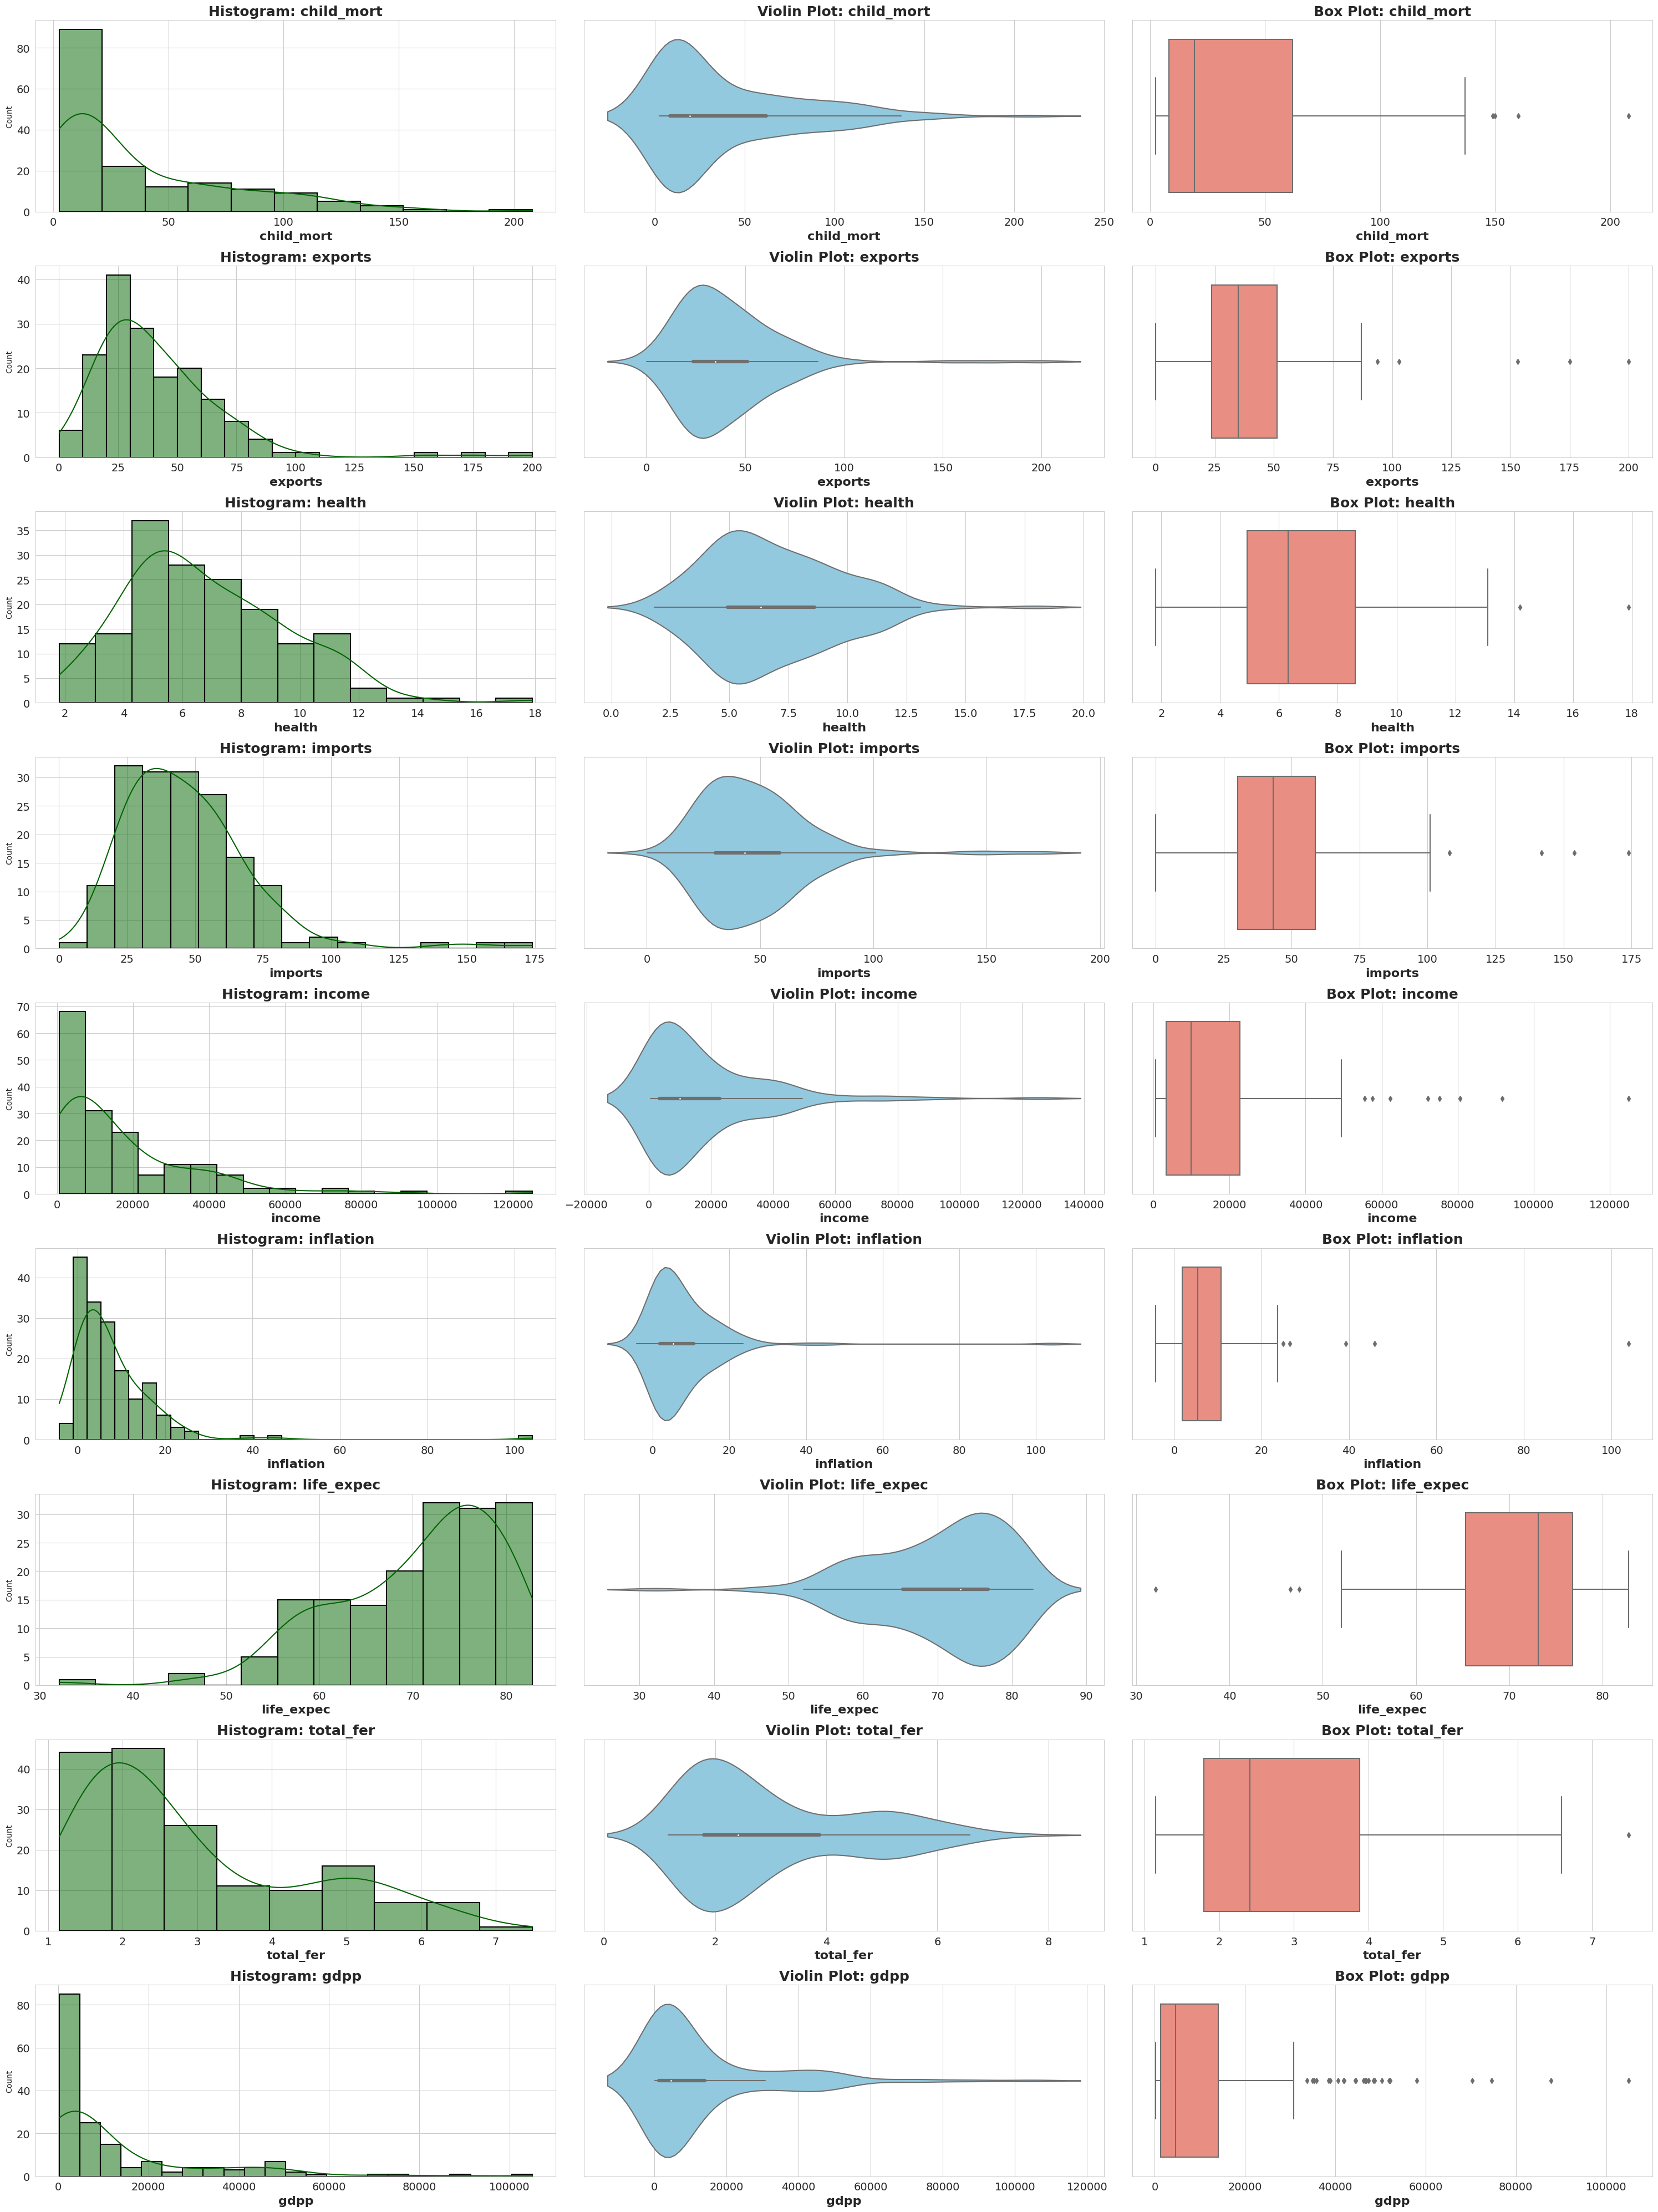

In [21]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(30, 40))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over the columns and plot
for i, col in enumerate(Df.drop(columns='country').columns):
    # Plot seaborn histogram with KDE
    sns.histplot(x=col, data=Df, kde=True, ax=axs[3*i], color='darkgreen', edgecolor='black', linewidth=1.5)
    axs[3*i].set_xlabel(col, fontsize=16, fontweight='bold')
    axs[3*i].set_title(f'Histogram: {col}', fontsize=18, fontweight='bold')
    axs[3*i].tick_params(axis='x', labelsize=14)
    axs[3*i].tick_params(axis='y', labelsize=14)

    # Plot seaborn violin plot
    sns.violinplot(x=col, data=Df, ax=axs[3*i + 1], color='skyblue')
    axs[3*i + 1].set_xlabel(col, fontsize=16, fontweight='bold')
    axs[3*i + 1].set_title(f'Violin Plot: {col}', fontsize=18, fontweight='bold')
    axs[3*i + 1].tick_params(axis='x', labelsize=14)
    axs[3*i + 1].tick_params(axis='y', labelsize=14)

    # Plot seaborn box plot
    sns.boxplot(x=col, data=Df, ax=axs[3*i + 2], color='salmon')
    axs[3*i + 2].set_xlabel(col, fontsize=16, fontweight='bold')
    axs[3*i + 2].set_title(f'Box Plot: {col}', fontsize=18, fontweight='bold')
    axs[3*i + 2].tick_params(axis='x', labelsize=14)
    axs[3*i + 2].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

#### Based on the plots, we observe that all the features exhibit a normal distribution with a right skew, except for the feature "life_expec" which shows a left skewed distribution.

# 

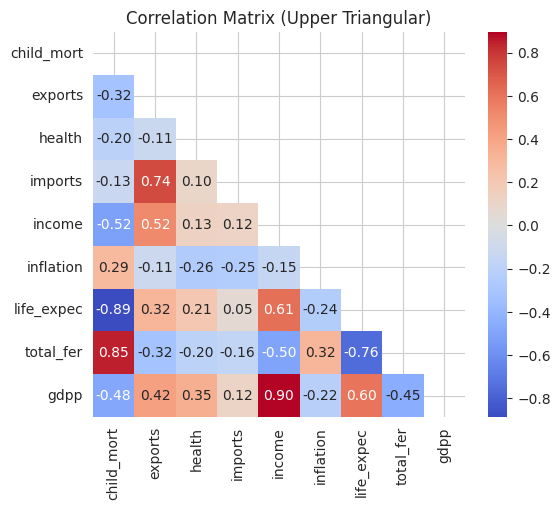

In [22]:
Df_numeric = Df.drop(columns=['country'])
corr_matrix = Df_numeric.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Matrix (Upper Triangular)')
plt.show()

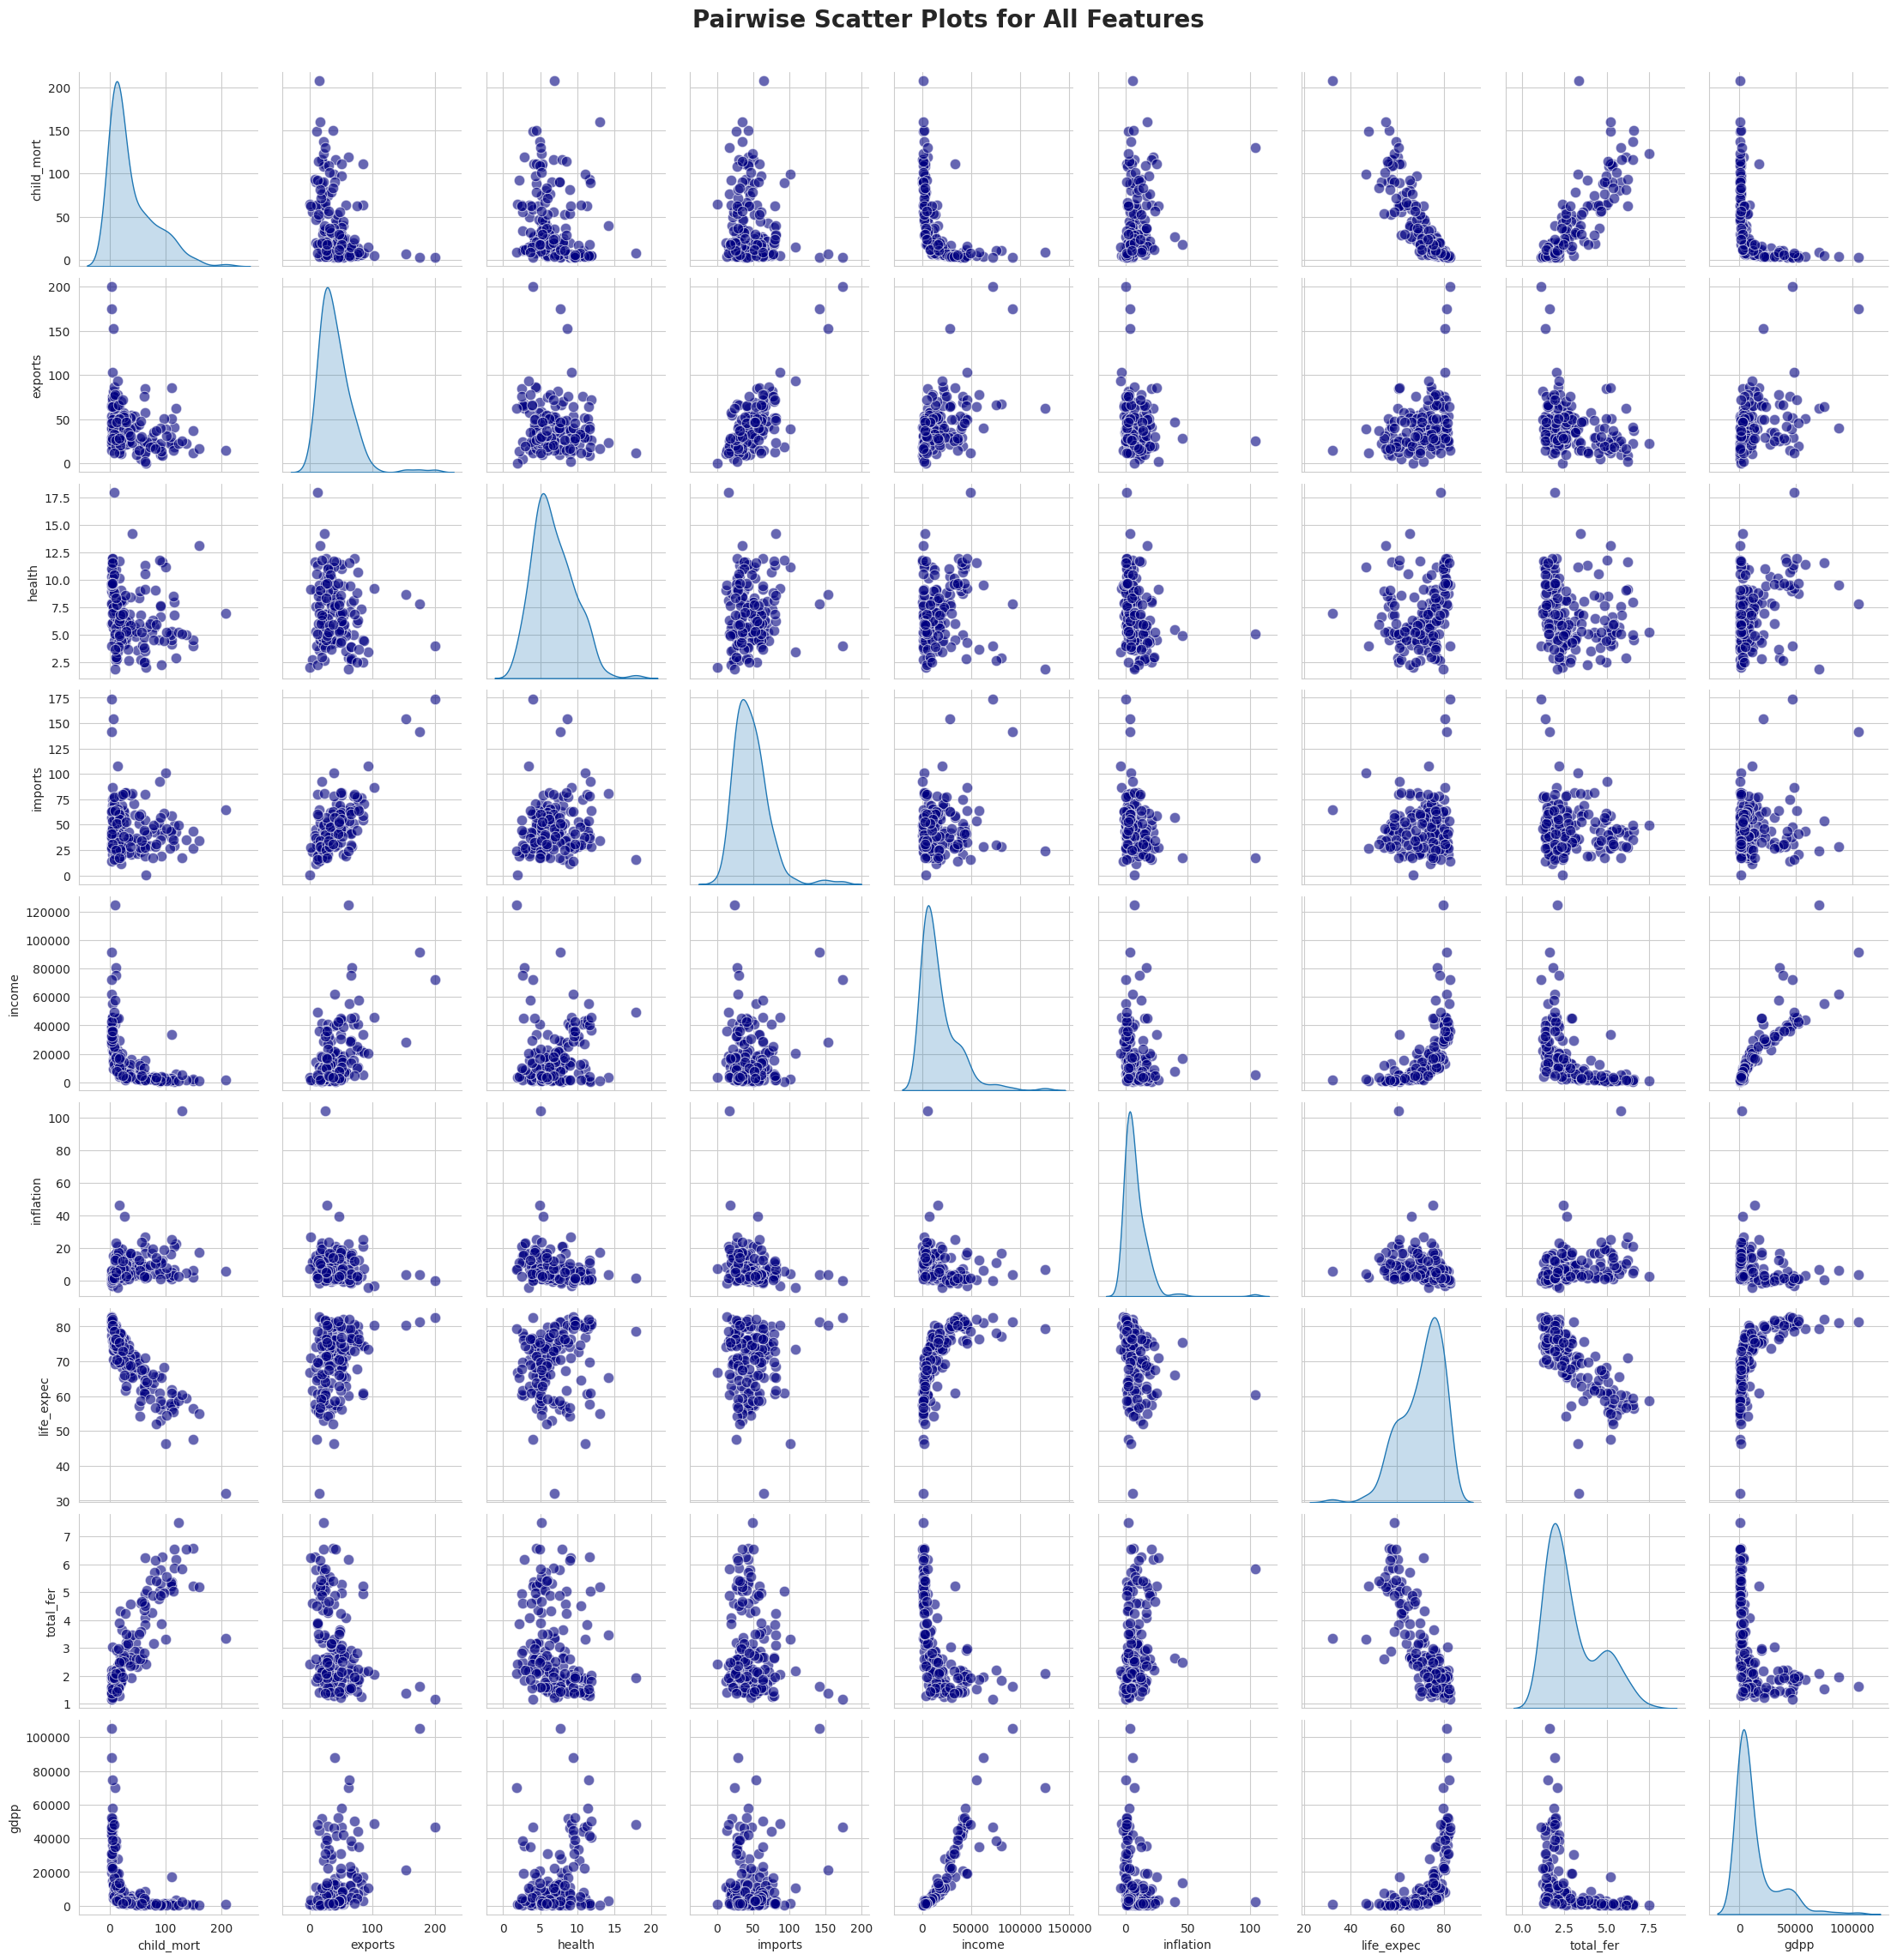

In [23]:
# Drop the 'country' column
Df_numeric = Df.drop(columns=['country'])

# Use seaborn's pairplot to create scatter plots for each pair of features
sns.pairplot(Df_numeric, diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'w', 'color':'navy'}, palette='husl')

# Show the plot
plt.suptitle('Pairwise Scatter Plots for All Features', y=1.02, fontsize=20, fontweight='bold')
plt.show()

We plot scatter plots for all features in pairs to observe correlations in a general manner. However, we will analyze them in more detail in the next code.

# 

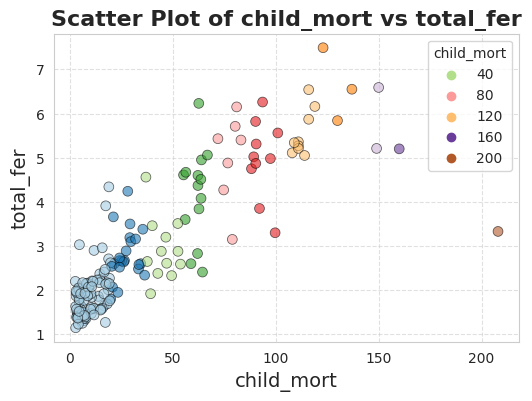

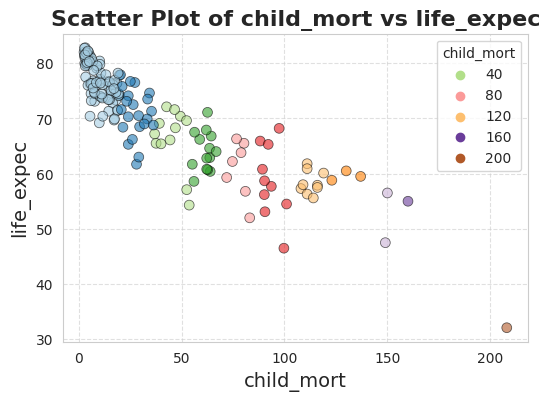

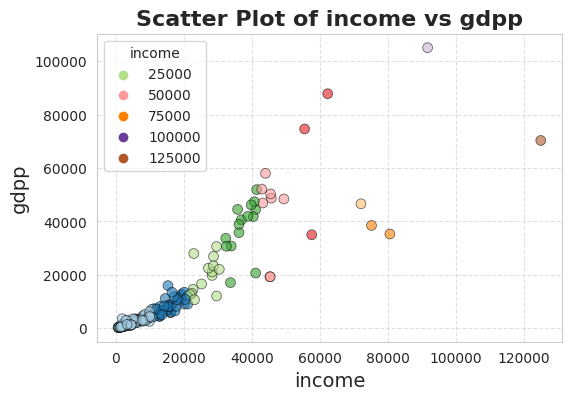

In [24]:
corr_matrix = Df.drop(columns='country').corr()

high_corr_columns = set()
threshold = 0.8  

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_columns.add((corr_matrix.columns[i], corr_matrix.columns[j]))

palette = sns.color_palette("Paired", as_cmap=True)

marker_size = 50
alpha_value = 0.6

for col1, col2 in high_corr_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=Df, x=col1, y=col2, hue=col1, palette=palette, s=marker_size, edgecolor='k', alpha=alpha_value)
    plt.title(f'Scatter Plot of {col1} vs {col2}', fontsize=16, fontweight='bold')
    plt.xlabel(col1, fontsize=14)
    plt.ylabel(col2, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

For the features that exhibited the highest correlations, we plotted scatter plots and reached the following conclusions:

1. For the two features `child_mort` and `life_expec`: As `child_mort` increases, we observe a significant decrease in `life_expec`.
2. For the two features `income` and `gdpp`: As `income` increases, `gdpp` also increases.
3. For the two features `child_mort` and `total_fer`: As `child_mort` increases, `total_fer` also increases.

# 

In [25]:
print(Df['country'].tolist())

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwa

In [26]:
import plotly.graph_objects as go
data = go.Choropleth(
    locations=Df['country'], 
    locationmode='country names',
    z=Df['child_mort'],  
    text=Df['country'],  
    colorscale='Rainbow', 
    colorbar_title='Child Mortality', 
)

layout = go.Layout(
    title='Child Mortality by Country', 
    geo=dict(
        showcoastlines=True, 
        projection=dict(type='orthographic'), 
    )
)

fig = go.Figure(data=[data], layout=layout)

fig.update_geos(
    showcountries=True,
    countrycolor="Black"
)

fig.show()

#### The lowest child mortality rates are found in countries in North America and Western Europe.
#### The highest child mortality rates are found in countries in Africa.

# 

In [27]:
data = go.Choropleth(
    locations=Df['country'], 
    locationmode='country names',
    z=Df['exports'],  
    text=Df['country'],  
    colorscale='Rainbow', 
    colorbar_title='Exports',  
)

layout = go.Layout(
    title='Exports by Country',  
    geo=dict(
        showcoastlines=True, 
        projection=dict(type='orthographic'),  
    )
)

fig = go.Figure(data=[data], layout=layout)

fig.update_geos(
    showcountries=True,
    countrycolor="Black"
)

fig.show()

In [28]:
data = go.Choropleth(
    locations=Df['country'], 
    locationmode='country names',
    z=Df['health'],  
    text=Df['country'],  
    colorscale='Rainbow', 
    colorbar_title='Health Expenditure', 
)

layout = go.Layout(
    title='Health Expenditure by Country', 
    geo=dict(
        showcoastlines=True, 
        projection=dict(type='orthographic'),  
    )
)

fig = go.Figure(data=[data], layout=layout)

fig.update_geos(
    showcountries=True,
    countrycolor="Black"
)

fig.show()

#### The highest health expenditure is found in countries in North America and Europe.
#### The lowest health expenditure is found in countries in Asia.

# 

In [29]:
data = go.Choropleth(
    locations=Df['country'], 
    locationmode='country names',
    z=Df['imports'], 
    text=Df['country'], 
    colorscale='Rainbow', 
    colorbar_title='Imports', 
)

layout = go.Layout(
    title='Imports by Country',  
    geo=dict(
        showcoastlines=True,  
        projection=dict(type='orthographic'), 
    )
)

fig = go.Figure(data=[data], layout=layout)

fig.update_geos(
    showcountries=True,
    countrycolor="Black"
)

fig.show()

In [30]:
data = go.Choropleth(
    locations=Df['country'],  
    locationmode='country names',
    z=Df['income'],  
    text=Df['country'], 
    colorscale='Rainbow', 
    colorbar_title='Income', 
)

layout = go.Layout(
    title='Income by Country',  
    geo=dict(
        showcoastlines=True, 
        projection=dict(type='orthographic'),  
    )
)

fig = go.Figure(data=[data], layout=layout)

fig.update_geos(
    showcountries=True,
    countrycolor="Black"
)

fig.show()

#### The highest income is found in Qatar and North America, Australia, and also in countries like Saudi Arabia, Oman, Sweden, Finland, Germany, France, and the United Kingdom.

# 

In [31]:
data = go.Choropleth(
    locations=Df['country'],  
    locationmode='country names',
    z=Df['inflation'], 
    text=Df['country'],
    colorscale='Rainbow',  
    colorbar_title='Inflation',  
)

layout = go.Layout(
    title='Inflation by Country', 
    geo=dict(
        showcoastlines=True,  
        projection=dict(type='orthographic'), 
    )
)

fig = go.Figure(data=[data], layout=layout)

fig.update_geos(
    showcountries=True,
    countrycolor="Black"
)

fig.show()

#### The highest inflation rate by far is in Nigeria, followed by Venezuela and then Mongolia.

# 

In [32]:
data = go.Choropleth(
    locations=Df['country'],  
    locationmode='country names',
    z=Df['life_expec'],  
    text=Df['country'],  
    colorscale='Rainbow',  
    colorbar_title='Life Expectancy', 
)

layout = go.Layout(
    title='Life Expectancy by Country',  
    geo=dict(
        showcoastlines=True,  
        projection=dict(type='orthographic'), 
    )
)

fig = go.Figure(data=[data], layout=layout)

fig.update_geos(
    showcountries=True,
    countrycolor="Black"
)

fig.show()

#### Life expectancy is highest in Australia, followed by North America and Europe. The lowest life expectancy is in Africa and the country of Afghanistan.

# 

In [33]:
data = go.Choropleth(
    locations=Df['country'], 
    locationmode='country names',
    z=Df['total_fer'],  
    text=Df['country'], 
    colorscale='Rainbow', 
    colorbar_title='Total Fertility Rate',  
)

layout = go.Layout(
    title='Total Fertility Rate by Country',  
    geo=dict(
        showcoastlines=True,  
        projection=dict(type='orthographic'), 
    )
)

fig = go.Figure(data=[data], layout=layout)

fig.update_geos(
    showcountries=True,
    countrycolor="Black"
)

fig.show()

#### The highest total fertility rate is found in most countries in Africa, as well as in Afghanistan, Pakistan, and Iraq.

# 

In [34]:
data = go.Choropleth(
    locations=Df['country'], 
    locationmode='country names',
    z=Df['gdpp'], 
    text=Df['country'],  
    colorscale='Rainbow', 
    colorbar_title='GDP per Capita', 
)

layout = go.Layout(
    title='GDP per Capita by Country',  
    geo=dict(
        showcoastlines=True, 
        projection=dict(type='orthographic'),  
    )
)

fig = go.Figure(data=[data], layout=layout)

fig.update_geos(
    showcountries=True,
    countrycolor="Black"
)

fig.show()

#### The highest GDP by far is in Norway.

# 

# 

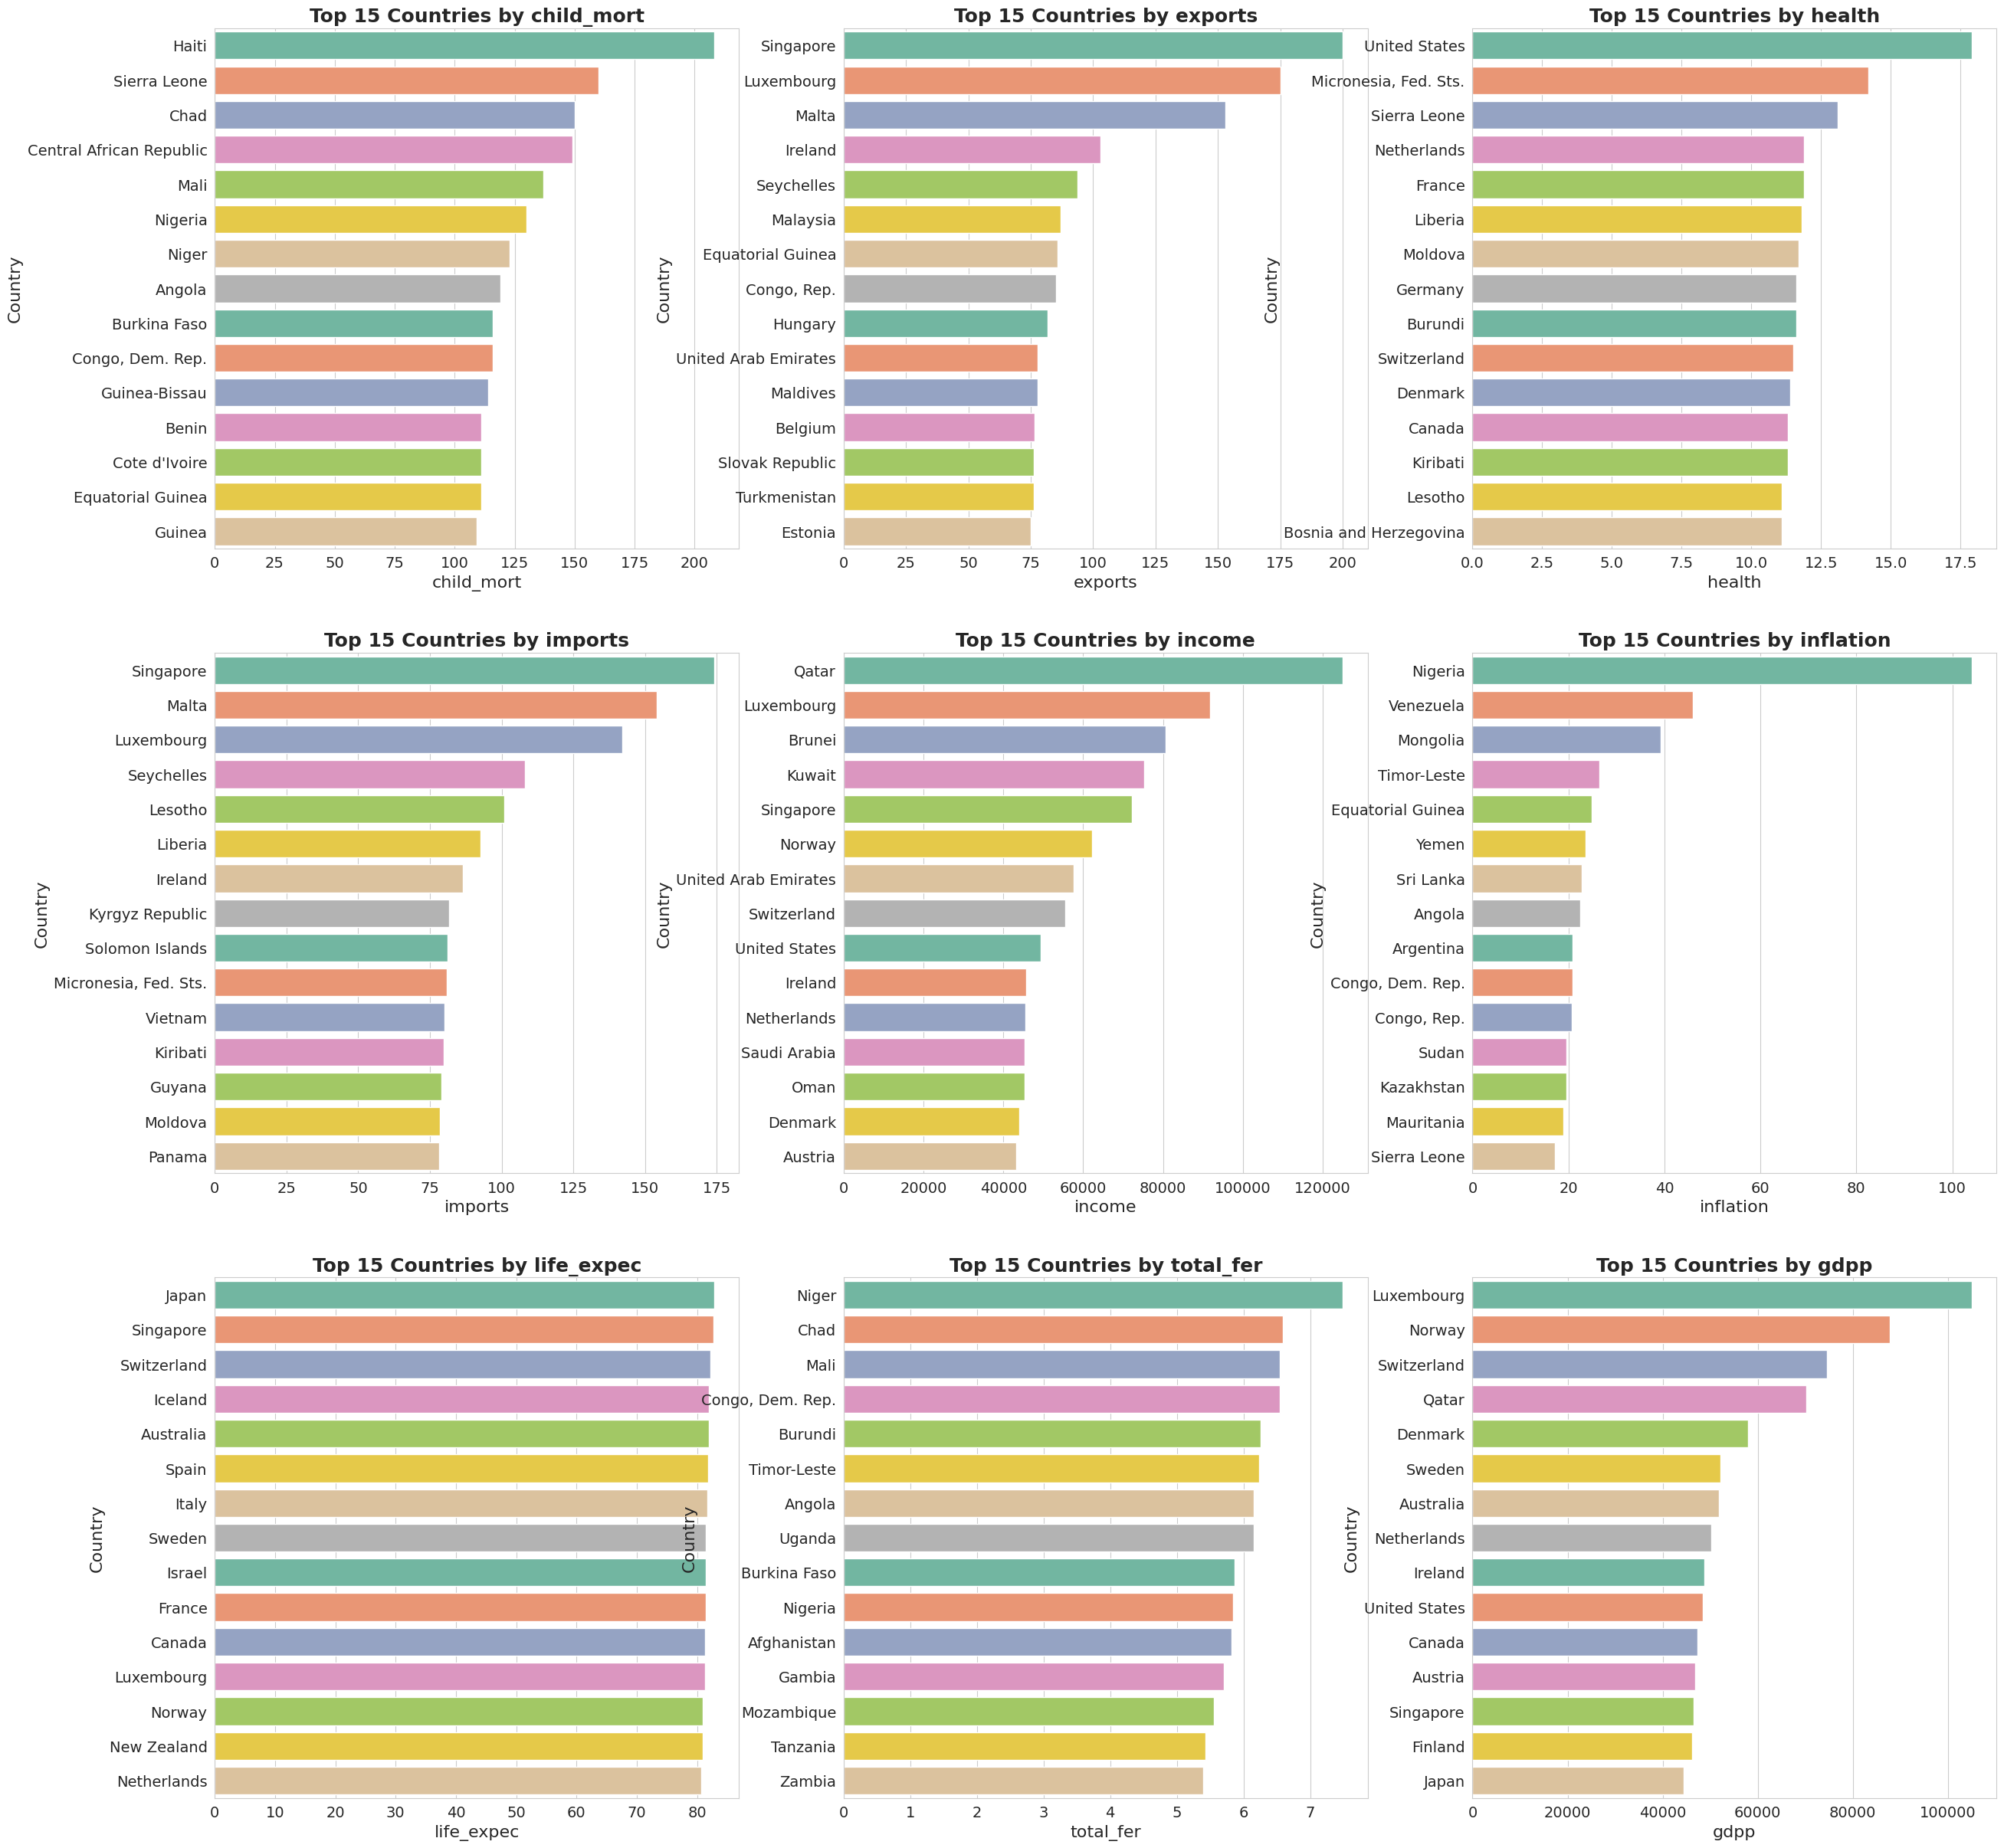

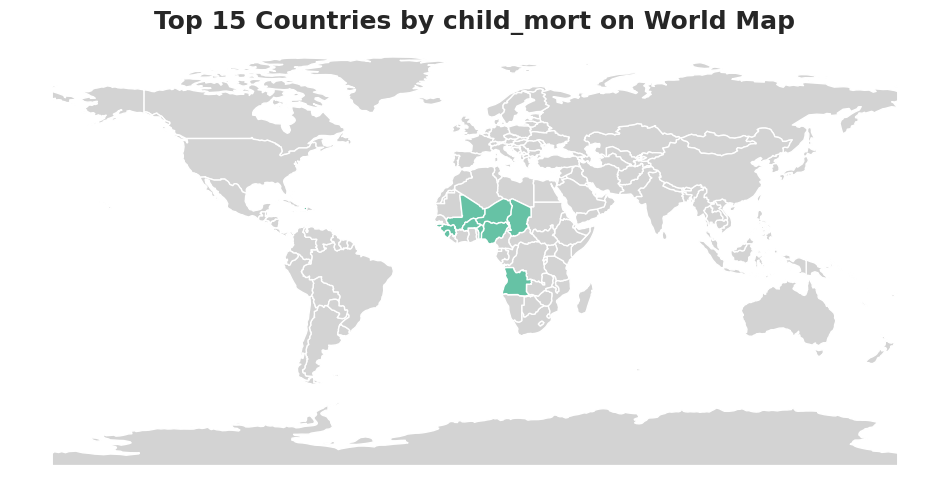

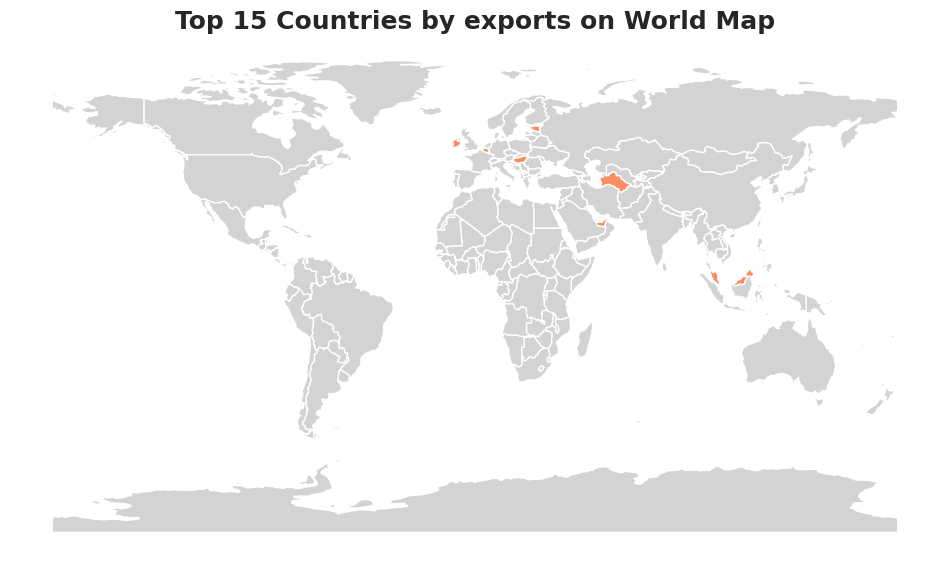

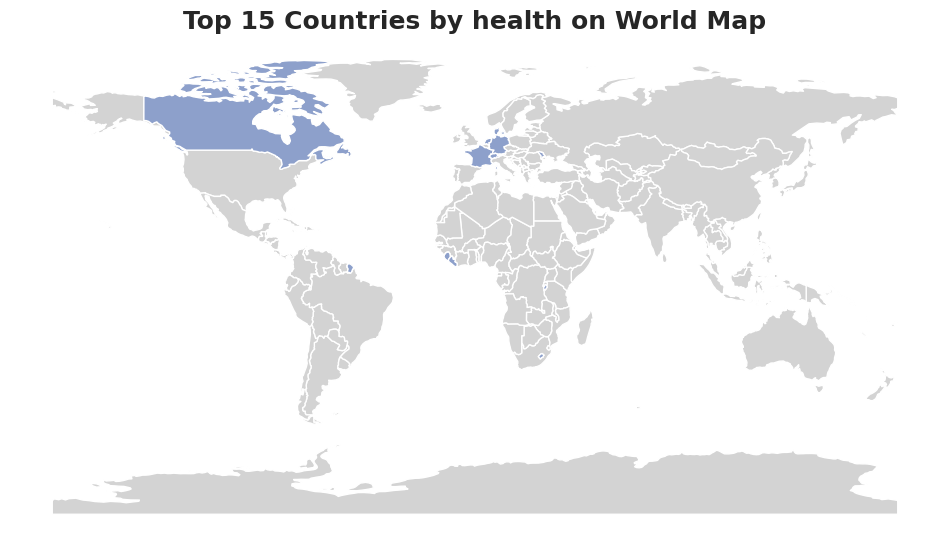

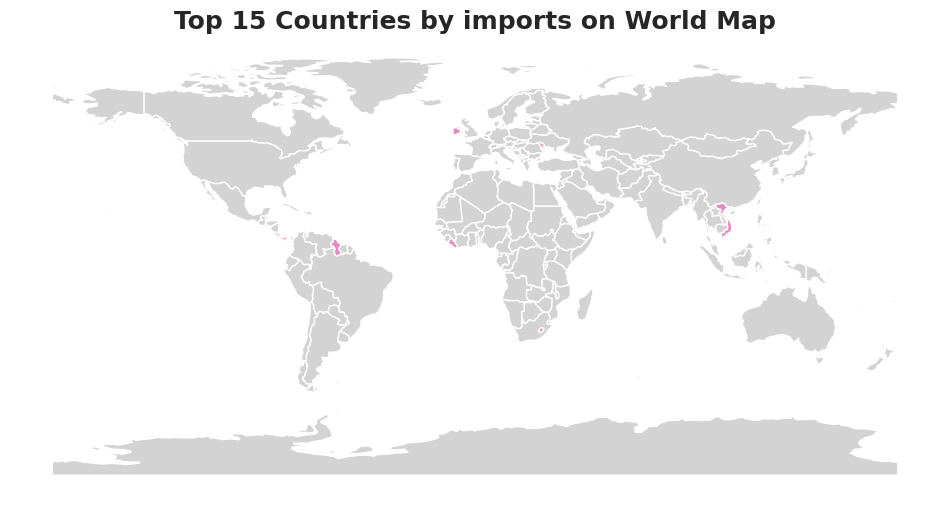

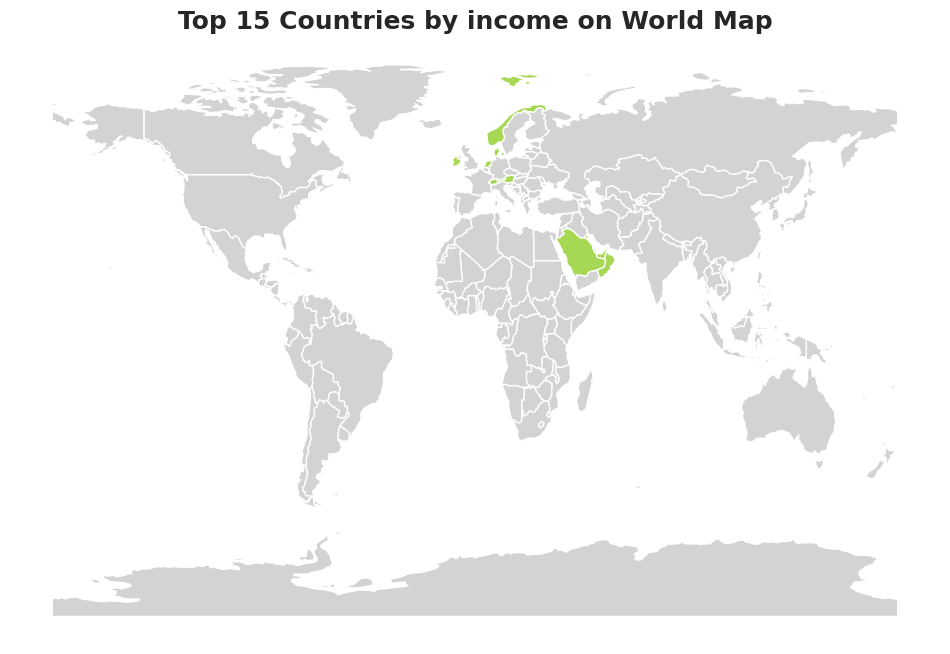

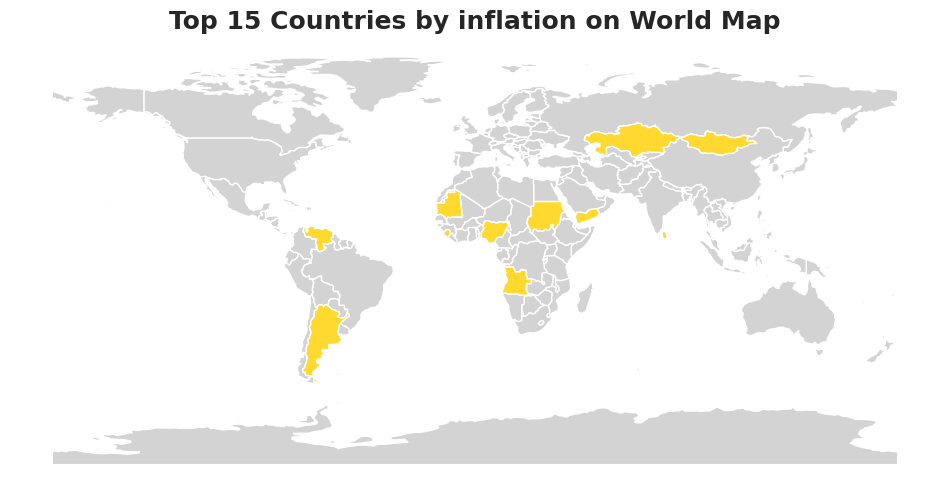

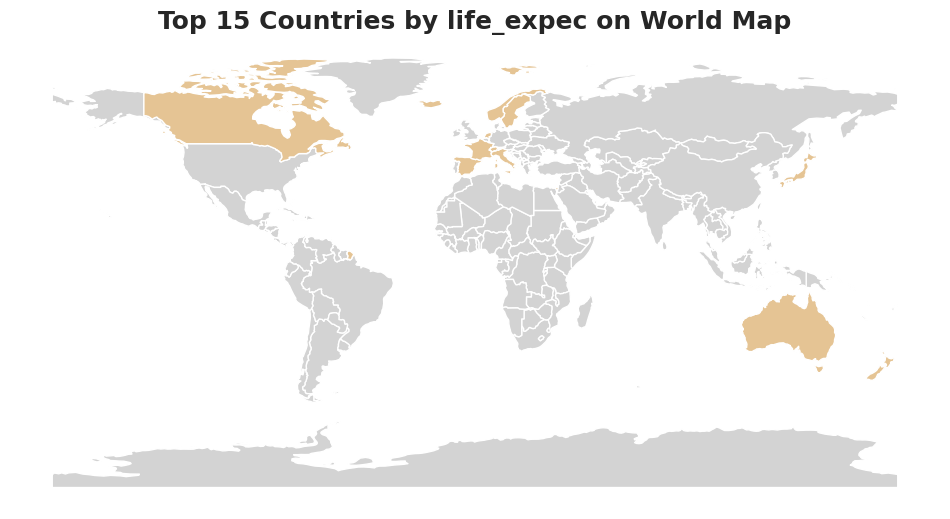

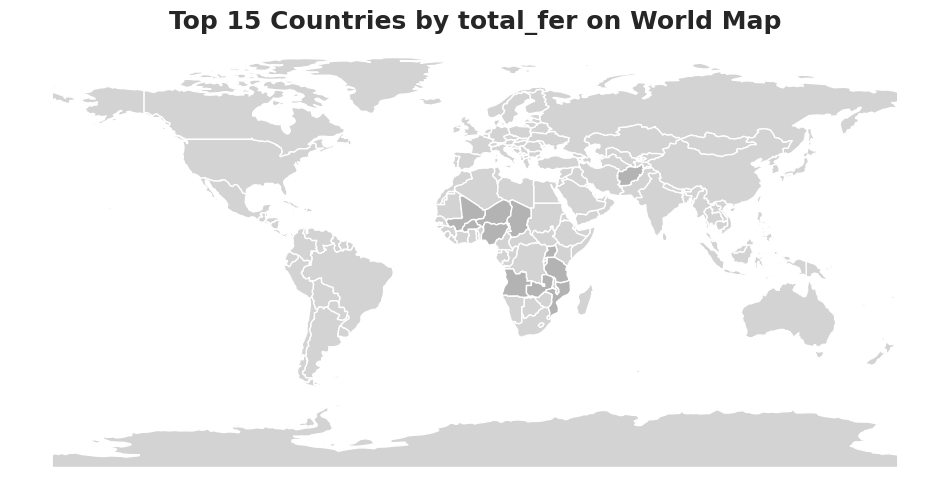

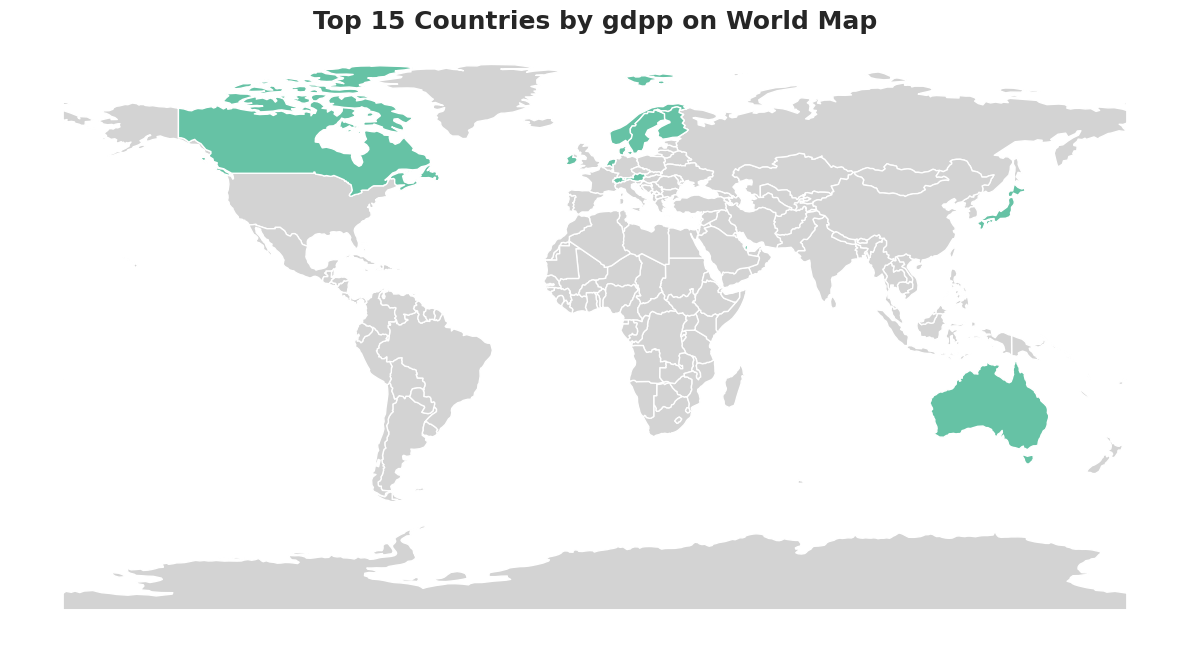

In [35]:
# Define custom color palette
custom_palette = sns.color_palette("Set2")

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create subplots in a 3x3 grid
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))

# Flatten the axs array for easier iteration
axs = axs.flatten()
DF_country = Df.copy()
for i, col in enumerate(DF_country.drop(columns='country').columns):
    top_15 = DF_country.sort_values(by=col, ascending=False).head(15)
    
    # Create barplot
    sns.barplot(data=top_15, x=col, y='country', palette=custom_palette, ax=axs[i])
    
    # Customize the plot with titles and labels
    axs[i].set_title(f'Top 15 Countries by {col}', fontsize=18, fontweight='bold')
    axs[i].set_xlabel(col, fontsize=16)
    axs[i].set_ylabel('Country', fontsize=16)
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)

    # Create a new figure for the world map
    fig_map, ax_map = plt.subplots(figsize=(12, 8))

    # Merge world map with top 15 countries
    top_15_map = world.merge(top_15, how="right", left_on="name", right_on="country")

    # Plot world map with top 15 countries highlighted
    world.plot(ax=ax_map, color='lightgrey')
    top_15_map.plot(ax=ax_map, color=custom_palette[i % len(custom_palette)], legend=True)
    
    ax_map.set_title(f'Top 15 Countries by {col} on World Map', fontsize=18, fontweight='bold')
    ax_map.set_axis_off()

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


#### In these charts, we analyze more precisely compared to the previous charts and display the top 15 countries in each column.

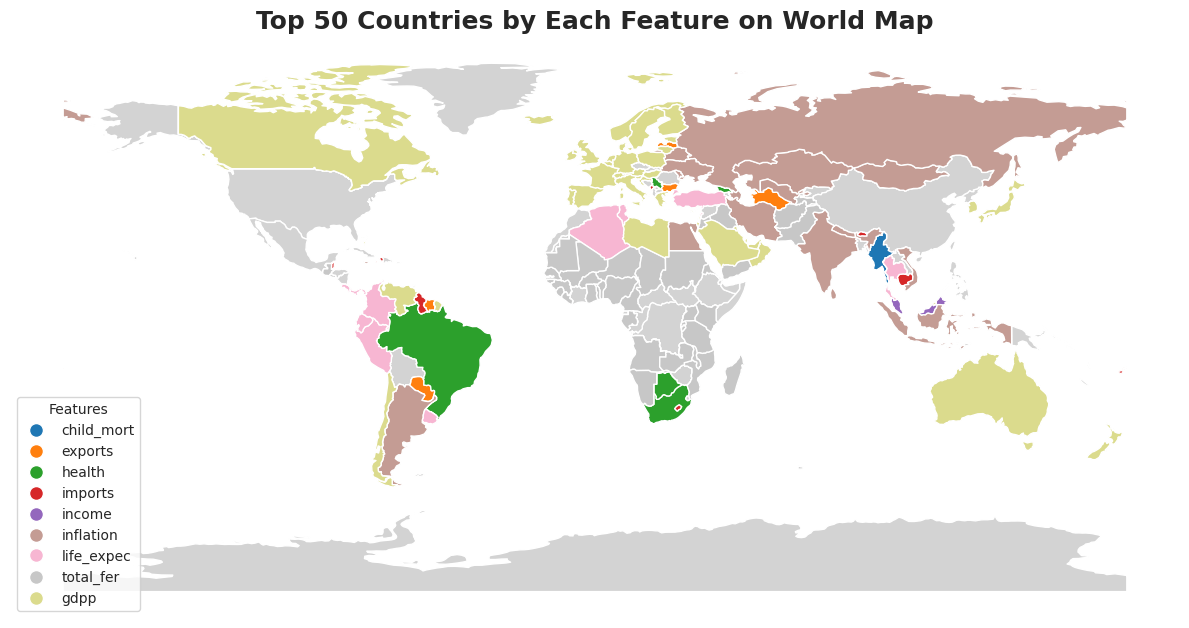

In [36]:
custom_palette = plt.cm.get_cmap('tab20', len(Df.columns))

# Normalize the data
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(Df.drop(columns='country')), columns=Df.drop(columns='country').columns)
normalized_data['country'] = Df['country']

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(12, 8))

world.plot(ax=ax, color='lightgrey')
legend_patches = []
for i, col in enumerate(normalized_data.drop(columns='country').columns):
    color = custom_palette(i)
    legend_patches.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=col))

for i, col in enumerate(normalized_data.drop(columns='country').columns):
    top_50 = normalized_data.sort_values(by=col, ascending=False).head(50)
    top_50_map = world.merge(top_50, how="right", left_on="name", right_on="country")
    color = custom_palette(i)
    top_50_map.plot(ax=ax, color=color)

plt.title('Top 50 Countries by Each Feature on World Map', fontsize=18, fontweight='bold')
ax.set_axis_off()
plt.legend(handles=legend_patches, loc='lower left', title='Features')

plt.tight_layout()
plt.show()

From the data analysis with the above scatter plots, the following observations can be made:

1. For the 'child_mort' feature: In developed continents and countries, the child mortality rate is higher. As seen in the last scatter plot, the highest rates of child mortality are observed in weaker and poorer countries.

2. For the 'gdpp' feature: In continents and advanced countries like North America, Australia, and Europe, the GDP rate is higher. As observed in the last chart, the highest gddp Rate is for developed countries.

3. For the 'life_expec' feature: In continents and advanced countries like North America, Australia, and Europe, life expectancy is higher. As observed in the last chart, the highest life expectancy rate is for developed countries.

4. For the 'health': In continents and advanced countries like North America, health life expectancy is significantly higher.

5. For the 'income' feature: In Europe and some countries in the Arab Gulf region, income is significantly higher.

6.  For the 'total_fer' feature: In Africa and some countries in the Arab Gulf region,total fertility rate is significantly higher.

7. For the 'inflation' feature: In Africa, Asia, and South America, the Annual Inflation rate is significantly higher.

In [37]:
Df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [38]:
Df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

# Principal Component Analysis (PCA)

PCA is a powerful tool in unsupervised learning models that helps with dimensionality reduction, improving computational efficiency, and visualization. This technique is particularly useful when you have large datasets with multiple features and want to identify hidden structures and important patterns.

# Normalization

In [39]:
df = Df.copy()
df.drop (columns = ['country'] , inplace = True)
df.head (10)

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610      9.440        56.2   
1        16.6     28.0    6.55     48.6    9930      4.490        76.3   
2        27.3     38.4    4.17     31.4   12900     16.100        76.5   
3       119.0     62.3    2.85     42.9    5900     22.400        60.1   
4        10.3     45.5    6.03     58.9   19100      1.440        76.8   
5        14.5     18.9    8.10     16.0   18700     20.900        75.8   
6        18.1     20.8    4.40     45.3    6700      7.770        73.3   
7         4.8     19.8    8.73     20.9   41400      1.160        82.0   
8         4.3     51.3   11.00     47.8   43200      0.873        80.5   
9        39.2     54.3    5.88     20.7   16000     13.800        69.1   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200  
5       2.37  10300  
6       1.69   3220  
7       1.93  51900  
8       1.44  46900  
9       1.92   5840

In [40]:
# Standardization
scaler = StandardScaler ()
scaled_features = scaler.fit_transform (df)
df_scaled_features = pd.DataFrame (scaled_features , columns = df.columns )
df_scaled_features

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

In [41]:
df_country_scaled = pd.DataFrame (df_scaled_features , columns = df.columns )
df_country_scaled.insert (loc = 0 , column = 'country', value = Df.country)
print (df_country_scaled.shape)
df_country_scaled.head ()

(167, 10)


country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1              Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2              Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3               Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4  Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   

   inflation  life_expec  total_fer      gdpp  
0   0.157336   -1.619092   1.902882 -0.679180  
1  -0.312347    0.647866  -0.859973 -0.485623  
2   0.789274    0.670423  -0.038404 -0.465376  
3   1.387054   -1.179234   2.128151 -0.516268  
4  -0.601749    0.704258  -0.541946 -0.041817

# 

# Create the model

# PCA

In [42]:
from sklearn.decomposition import PCA
X = scaled_features
pca = PCA ()
pca.fit_transform (X) 

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [43]:
# The variance values of each feature
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [44]:
# Eigen Values _(percent)
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

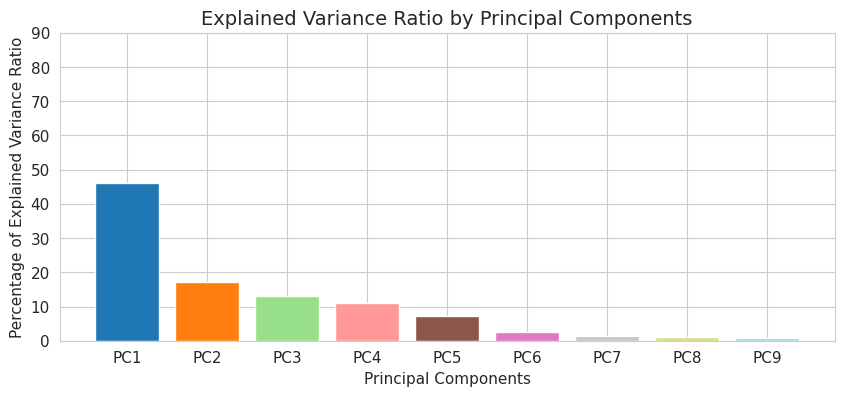

In [45]:
explained_variance_ratio = pca.explained_variance_ratio_
colors = plt.cm.tab20(np.linspace(0, 1, len(explained_variance_ratio)))
plt.figure(figsize=(10, 4), dpi=100)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, color=colors, tick_label=["PC" + str(x+1) for x in range(len(explained_variance_ratio))])
plt.xticks(fontsize=11)
plt.yticks(np.arange(0, 100, 10), fontsize=11)  
plt.xlabel('Principal Components', size=11)
plt.ylabel('Percentage of Explained Variance Ratio', size=11)
plt.title('Explained Variance Ratio by Principal Components', fontsize=14)  
plt.show()

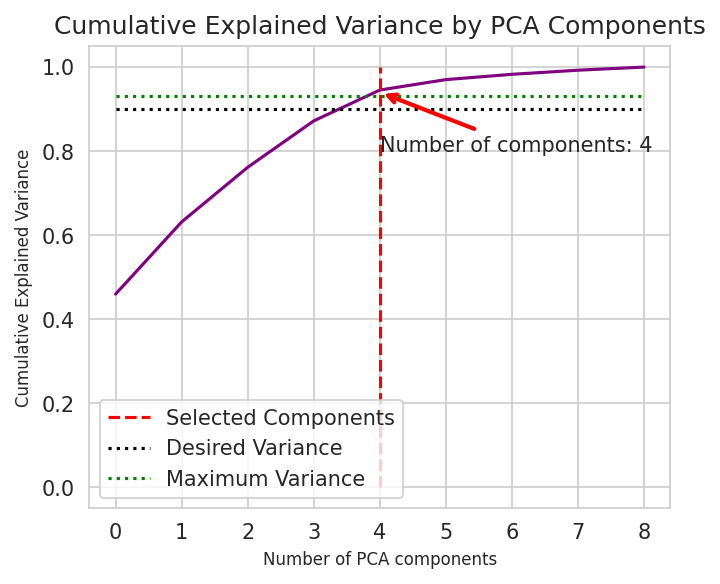

In [46]:
fig = plt.figure(figsize=(5, 4), dpi=150)

plt.plot(np.cumsum(pca.explained_variance_ratio_), color="purple")
plt.vlines(x=4, ymax=1, ymin=0, colors="red", linestyles='--', label='Selected Components')
plt.hlines(y=0.9, xmax=8, xmin=0, colors="black", linestyles=':', label='Desired Variance')
plt.hlines(y=0.93, xmax=8, xmin=0, colors="green", linestyles=':', label='Maximum Variance')
plt.xlabel('Number of PCA components', fontsize=8)
plt.ylabel('Cumulative Explained Variance', fontsize=8)
plt.grid(True)

plt.annotate('Number of components: 4',
             xy=(4, 0.94),
             xytext=(4, 0.8),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

plt.title('Cumulative Explained Variance by PCA Components', fontsize=12)
plt.legend()
plt.show()

#### By applying the elbow method, we determined that using k = 4 for the number of clusters is optimal.

# 

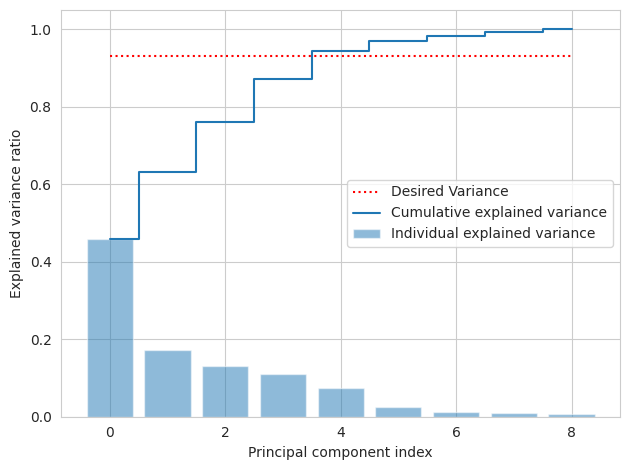

In [47]:
exp_var_pca = pca.explained_variance_ratio_
# cum_sum_eigenvalues = Cumulative sum of eigenvalues; 
# This will be used to create step plot for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.hlines(y=0.93, xmax=8, xmin=0, colors="red", linestyles=":", label="Desired Variance")
plt.bar(range(len(exp_var_pca)), exp_var_pca, alpha=0.5, align="center", label="Individual explained variance")
plt.step(range(len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where="mid", label="Cumulative explained variance")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### In this study, we found that using 4 components was the best choice for PCA.

# 

In [48]:
from sklearn.decomposition import PCA
pca_1 = PCA (n_components = 4)
pca_2 = pca_1.fit_transform (X)

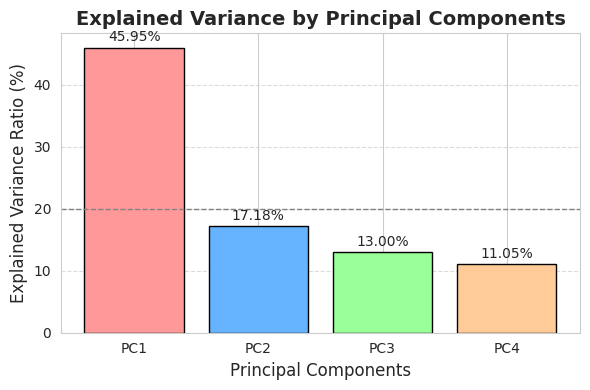

In [49]:
# Assume PCA has already been performed and results are in pca_1
explained_variance = pca_1.explained_variance_ratio_
# Create a bar plot to show the explained variance ratio of each principal component
plt.figure(figsize=(6, 4))  # Change the figure size to smaller dimensions
bars = plt.bar(range(1, 5), explained_variance[:4] * 100, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'], edgecolor='black')
# Add percentage labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)
# Set axis labels and title
plt.xticks(range(1, 5), ["PC" + str(i) for i in range(1, 5)], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio (%)', fontsize=12)
plt.title('Explained Variance by Principal Components', fontsize=14, fontweight='bold')
# Add a grid with customized style
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add a horizontal line indicating a threshold
plt.axhline(y=20, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [50]:
pca_2_df = pd.DataFrame (pca_2) 
pca_2_df.columns = ["PC1" , "PC2", "PC3", "PC4"]
pca_2_df

PC1       PC2       PC3       PC4
0   -2.913025  0.095621 -0.718118  1.005255
1    0.429911 -0.588156 -0.333486 -1.161059
2   -0.285225 -0.455174  1.221505 -0.868115
3   -2.932423  1.695555  1.525044  0.839625
4    1.033576  0.136659 -0.225721 -0.847063
..        ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595
163 -0.551036 -1.233886  3.101350 -0.115311
164  0.498524  1.390744 -0.238526 -1.074098
165 -1.887451 -0.109453  1.109752  0.056257
166 -2.864064  0.485998  0.223167  0.816364

[167 rows x 4 columns]

In [51]:
from sklearn.cluster import KMeans
kmeans_set = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
Inertia = []
for k in range (1, 11):
    kmeans = KMeans (n_clusters = k, **kmeans_set) # ** opens the dictionary
    kmeans.fit (pca_2_df)
    Inertia.append (kmeans.inertia_) 

In [52]:
import warnings
warnings.simplefilter("ignore")

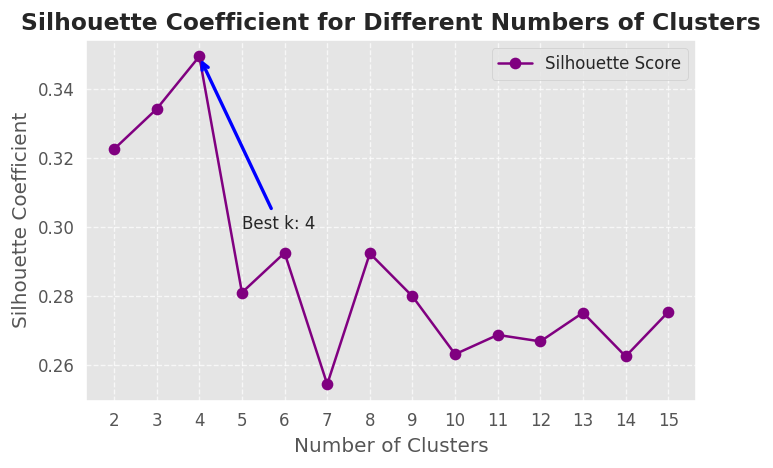

In [53]:
# List to store silhouette coefficients for different numbers of clusters
silhouette_scores = []
# Loop to calculate silhouette score for each k from 2 to 15
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_2_df)
    score = silhouette_score(pca_2_df, kmeans.labels_)
    silhouette_scores.append(score)
# Plotting the silhouette scores
plt.style.use("ggplot")
plt.figure(figsize=(6, 4), dpi=120)
# Plotting the silhouette scores
plt.plot(range(2, 16), silhouette_scores, marker='o', linestyle='-', color='purple', label="Silhouette Score")
plt.xticks(range(2, 16), fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Coefficient", fontsize=12)
plt.title("Silhouette Coefficient for Different Numbers of Clusters", fontsize=14, fontweight='bold')
# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)
# Adding annotation for the best number of clusters
best_k = np.argmax(silhouette_scores) + 2  # Adding 2 because the range starts at 2
best_score = max(silhouette_scores)
plt.annotate(f'Best k: {best_k}', 
             xy=(best_k, best_score), 
             xytext=(best_k + 1, best_score - 0.05),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### By applying the Silhouette method, we determined that using k = 4 for the number of clusters is optimal.

# 

In [54]:
from sklearn.cluster import KMeans
kmean_set = {'init':'random', 'n_init':10, 'max_iter':300, 'random_state':1} 
kmeans = KMeans (n_clusters = 4 , **kmean_set )
kmeans = kmeans.fit (pca_2_df)
cluster = kmeans.labels_
print (cluster)

[2 3 3 2 3 3 3 0 0 3 3 3 3 3 3 0 3 2 3 3 3 2 3 0 3 2 2 3 2 0 3 2 2 3 3 3 2
 2 2 3 2 3 0 3 0 3 3 3 3 2 2 3 3 0 0 2 2 3 0 2 0 3 3 2 2 3 2 3 0 3 3 3 2 0
 0 0 3 0 3 3 2 2 0 3 2 3 3 2 2 3 3 1 3 2 2 3 3 2 1 2 3 2 3 3 3 3 2 3 2 3 0
 0 2 2 0 3 2 3 3 3 3 3 0 0 3 3 2 3 3 2 3 3 2 1 3 0 2 2 0 0 3 3 2 3 0 0 3 2
 3 2 2 3 3 3 3 2 3 0 0 0 3 3 3 3 3 2 2]


In [55]:
df_country_scaled = pd.DataFrame (df_scaled_features , columns = df.columns )
df_country_scaled.insert (loc = 0 , column = 'country', value = Df.country)
print (df_country_scaled.shape)
df_country_scaled.head ()

(167, 10)


country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1              Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2              Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3               Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4  Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   

   inflation  life_expec  total_fer      gdpp  
0   0.157336   -1.619092   1.902882 -0.679180  
1  -0.312347    0.647866  -0.859973 -0.485623  
2   0.789274    0.670423  -0.038404 -0.465376  
3   1.387054   -1.179234   2.128151 -0.516268  
4  -0.601749    0.704258  -0.541946 -0.041817

In [56]:
df_country_scaled_cluster = df_country_scaled.copy ()
df_country_scaled_cluster ["Cluster"] = kmeans.labels_
df_country_scaled_cluster

country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer      gdpp  Cluster  
0     0.157336   -1.619092   1.902882 -0.679180        2  
1    -0.312347    0.647866  -0.859973 -0.485623        3  
2     0.789274    0.670423  -0.038404 -0.465376        3  
3     1.387054   -1.179234   2.128151 -0.516268        2  
4    -0.601749    0.704258  -0.541946 -0.041817        3  
..         ...         ...        ...       ...      ...  
162  -0.489784   -0.852161   0.365754 -0.546913        3  
163   3.616865    0.546361  -0.316678  0.029323        3  
164   0.409732    0.286958  -0.661206 -0.637754        3  
165   1.500916   -0.344633   1.140944 -0.637754        2  
166   0.590015   -2.092785   1.624609 -0.629546        2  

[167 rows x 11 columns]

In [57]:
cluster_counts = df_country_scaled_cluster['Cluster'].value_counts()
def highlight_alternate(s):
    return ['background-color: yellow' if i % 2 == 0 else '' for i in range(len(s))]
styled_cluster_counts = cluster_counts.to_frame().style.apply(highlight_alternate, axis=0)
styled_cluster_counts

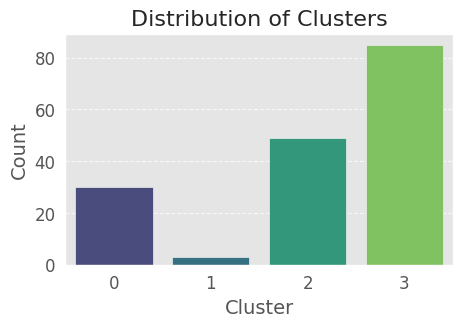

In [58]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df_country_scaled_cluster, x="Cluster", palette="viridis")
plt.title("Distribution of Clusters", fontsize=16)
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Number of Clusters: 4


<Figure size 1200x1000 with 0 Axes>

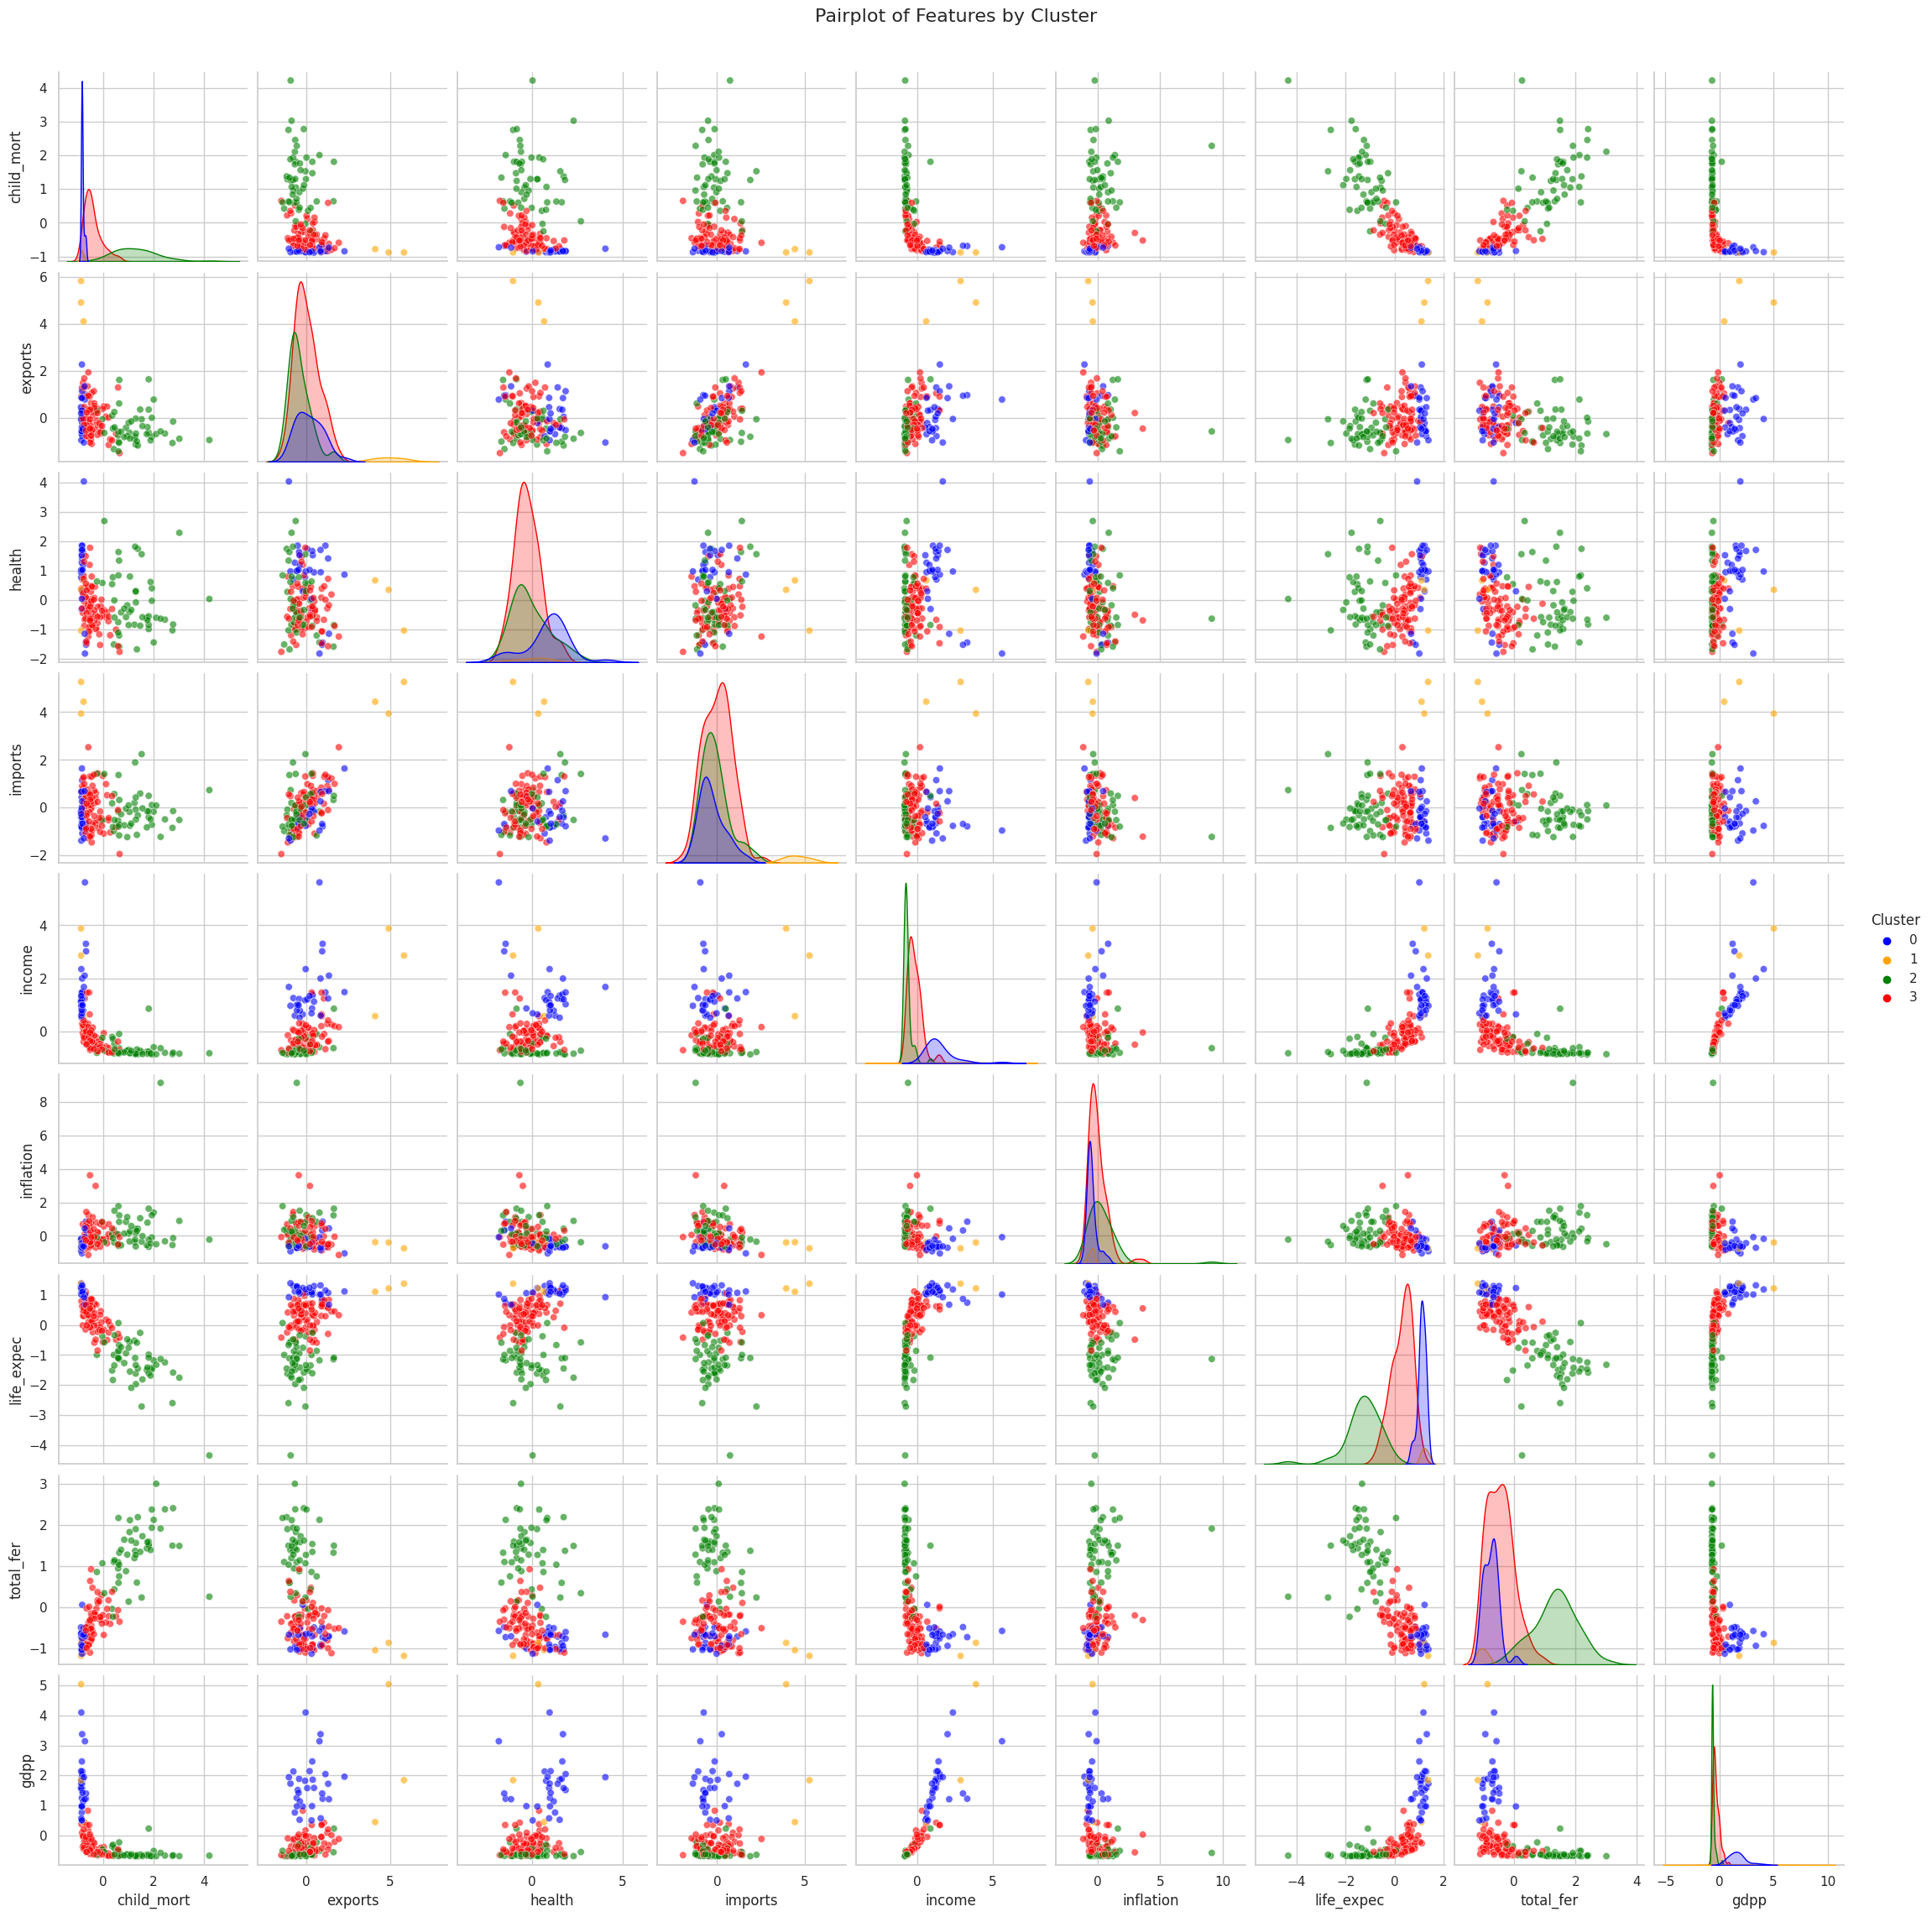

In [59]:
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")
print('Number of Clusters: 4')
pair_plot = sns.pairplot(
    df_country_scaled_cluster, 
    hue='Cluster', 
    palette={0: 'blue', 1: 'orange', 2: 'green', 3: 'red'}, 
    plot_kws={'alpha': 0.6}
)
pair_plot.fig.suptitle("Pairplot of Features by Cluster", y=1.02, fontsize=16)
for ax in pair_plot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.set_title(ax.get_title(), fontsize=14)
plt.show()

In [60]:
pca_2_df_cluster = pd.DataFrame (pca_2) 
pca_2_df_cluster.columns = ["PC1" , "PC2", "PC3", "PC4"]
pca_2_df_cluster
pca_2_df_cluster ['Cluster']= df_country_scaled_cluster ["Cluster"]
pca_2_df_cluster

PC1       PC2       PC3       PC4  Cluster
0   -2.913025  0.095621 -0.718118  1.005255        2
1    0.429911 -0.588156 -0.333486 -1.161059        3
2   -0.285225 -0.455174  1.221505 -0.868115        3
3   -2.932423  1.695555  1.525044  0.839625        2
4    1.033576  0.136659 -0.225721 -0.847063        3
..        ...       ...       ...       ...      ...
162 -0.820631  0.639570 -0.389923 -0.706595        3
163 -0.551036 -1.233886  3.101350 -0.115311        3
164  0.498524  1.390744 -0.238526 -1.074098        3
165 -1.887451 -0.109453  1.109752  0.056257        2
166 -2.864064  0.485998  0.223167  0.816364        2

[167 rows x 5 columns]

In [61]:
pca_2_df_cluster_country = pca_2_df_cluster.copy ()
pca_2_df_cluster_country ['country'] = Df ['country']
pca_2_df_cluster_country.head (10)

PC1       PC2       PC3       PC4  Cluster              country
0 -2.913025  0.095621 -0.718118  1.005255        2          Afghanistan
1  0.429911 -0.588156 -0.333486 -1.161059        3              Albania
2 -0.285225 -0.455174  1.221505 -0.868115        3              Algeria
3 -2.932423  1.695555  1.525044  0.839625        2               Angola
4  1.033576  0.136659 -0.225721 -0.847063        3  Antigua and Barbuda
5  0.022407 -1.779187  0.869997 -0.036967        3            Argentina
6 -0.101584 -0.568252  0.242092 -1.466266        3              Armenia
7  2.342165 -1.988459  0.190344  1.105038        0            Australia
8  2.973764 -0.734689 -0.519766  1.205442        0              Austria
9 -0.181487 -0.402866  0.867459 -0.438773        3           Azerbaijan

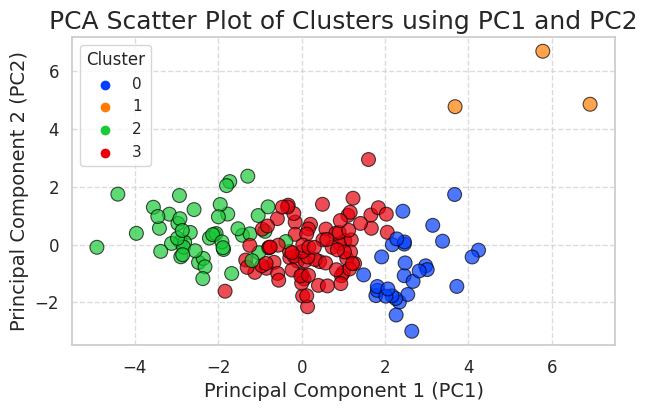

In [62]:
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")
ax = sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    data=pca_2_df_cluster_country, 
    palette='bright', 
    s=100,  
    alpha=0.7, 
    edgecolor='black'  
)
plt.title('PCA Scatter Plot of Clusters using PC1 and PC2', fontsize=18)
plt.xlabel('Principal Component 1 (PC1)', fontsize=14)
plt.ylabel('Principal Component 2 (PC2)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

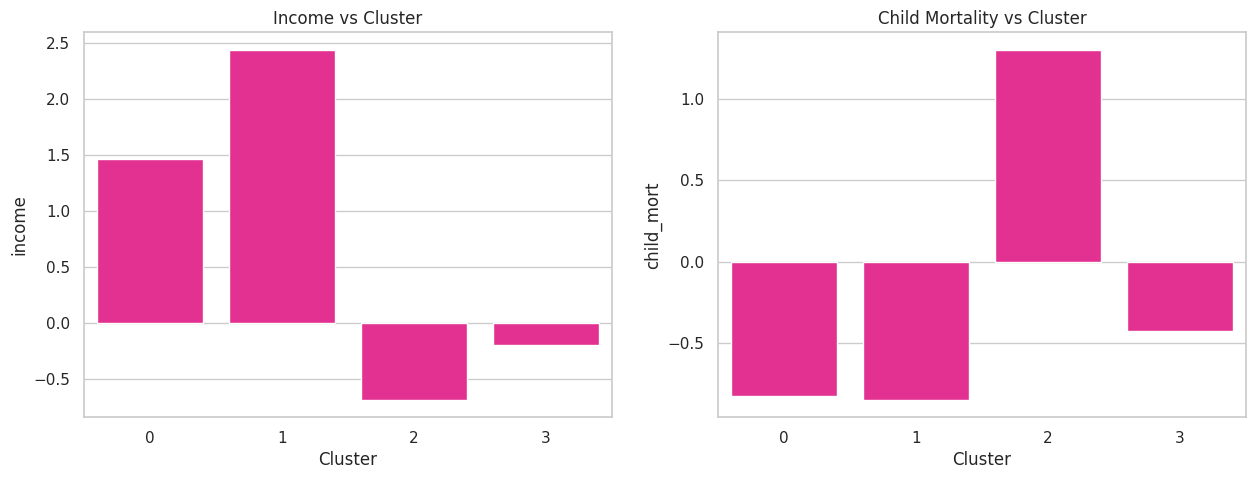

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# Income vs Cluster
plt.subplot(1, 2, 1)
sns.barplot(x='Cluster', y='income', data=df_country_scaled_cluster, ci=None, color='DeepPink')
plt.title('Income vs Cluster')
# Child_Mort vs Cluster
plt.subplot(1, 2, 2)
sns.barplot(x='Cluster', y='child_mort', data=df_country_scaled_cluster, ci=None, color='DeepPink')
plt.title('Child Mortality vs Cluster')
plt.show()

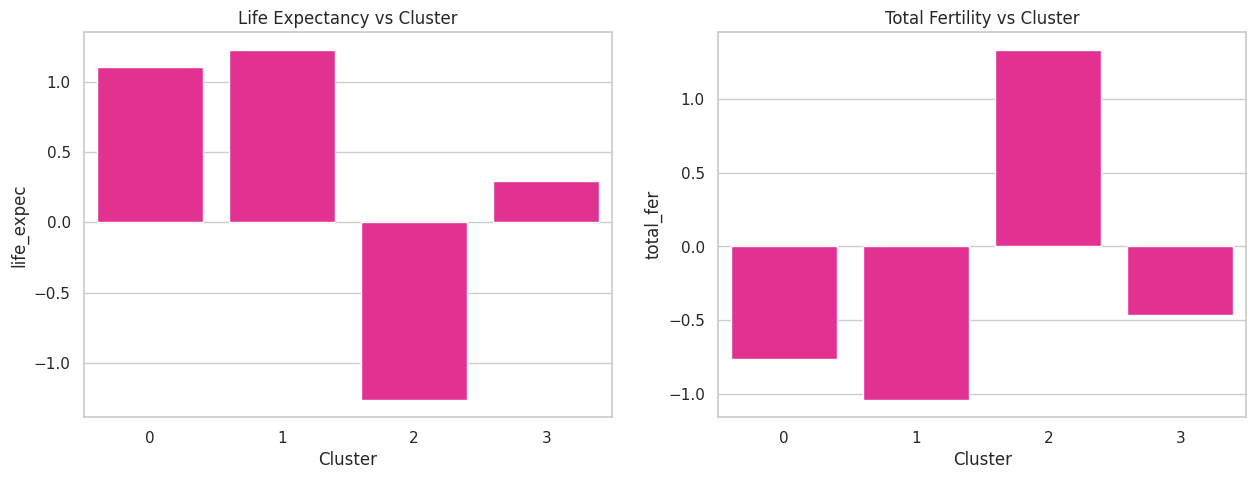

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# Life_Expec vs Cluster
plt.subplot(1, 2, 1)
sns.barplot(x='Cluster', y='life_expec', data=df_country_scaled_cluster, ci=None, color='DeepPink')
plt.title('Life Expectancy vs Cluster')
# Total_Fer vs Cluster
plt.subplot(1, 2, 2)
sns.barplot(x='Cluster', y='total_fer', data=df_country_scaled_cluster, ci=None, color='DeepPink')
plt.title('Total Fertility vs Cluster')
plt.show()


Countries that have poor standings in these four indicators (income, life expectancy, child mortality, and fertility) are in need of more help and attention. The charts show that these countries are in a worse condition compared to others and likely require more support and developmental programs to improve the living conditions for their people.

# 

#### Considering the variables "Income", "Life_Expec", "Child_Mort", and "Total_Fer", we can determine which groups of countries are more in need of assistance.

1. Cluster 0:
Lower Middle Developed Countries (Might Need Help)
Countries with moderate levels of "Income" and "Life_Expec" as well as moderate levels of "Child_Mort" and "Total_Fer".

2. Cluster 1:
Upper Middle Developed Countries (Do Not Need Help)
Countries with high levels of "Income" and "Life_Expec" and low levels of "Child_Mort" and "Total_Fer".

3. Cluster 2:
Highly Developed Countries (Do Not Need Any Help)
Countries with the highest levels of "Income" and "Life_Expec" and the lowest levels of "Child_Mort" and "Total_Fer".

4. Cluster 3:
Non-Developed Countries (Need Help)
Countries with the lowest levels of "Income" and "Life_Expec" and the highest levels of "Child_Mort" and "Total_Fer".

# 

In [65]:
df_country_scaled_cluster_label = df_country_scaled_cluster.copy()
cluster_labels = {
    0: '**Cluster 0: Lower Middle Developed Countries**\n*(Possibly in Need of Assistance)*',
    1: '**Cluster 1: Upper Middle Developed Countries**\n*(Do Not Require Assistance)*',
    2: '**Cluster 2: Highly Developed Countries**\n*(No Assistance Needed)*',
    3: '**Cluster 3: Non-Developed Countries**\n*(In Need of Assistance)*'
}
df_country_scaled_cluster_label['Label'] = df_country_scaled_cluster_label['Cluster'].map(cluster_labels)
df_country_scaled_cluster_label.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1              Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2              Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3               Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4  Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   

   inflation  life_expec  total_fer      gdpp  Cluster  \
0   0.157336   -1.619092   1.902882 -0.679180        2   
1  -0.312347    0.647866  -0.859973 -0.485623        3   
2   0.789274    0.670423  -0.038404 -0.465376        3   
3   1.387054   -1.179234   2.128151 -0.516268        2   
4  -0.601749    0.704258  -0.541946 -0.041817        3   

                                               Label  
0  **Cluster 2: Highly Developed Countries**\n*(N...  
1  **Cluster 3: Non-Developed Countries**\n*(In N...  
2  **Cluster 3: Non-Developed Countries**\n*(In N...  
3  **Cluster 2: Highly Developed Countries**\n*(N...  
4  **Cluster 3: Non-Developed Countries**\n*(In N...

In [66]:
import plotly.express as px
# Define new labels and colors based on the provided clusters
new_labels = {
    0: 'Lower Middle Developed Countries\n(Possibly in Need of Assistance)',
    1: 'Upper Middle Developed Countries\n(Do Not Require Assistance)',
    2: 'Highly Developed Countries\n(No Assistance Needed)',
    3: 'Non-Developed Countries\n(In Need of Assistance)'
}
new_color_map = {
    'Lower Middle Developed Countries\n(Possibly in Need of Assistance)': '#2ca02c',  # Green
    'Upper Middle Developed Countries\n(Do Not Require Assistance)': '#1f77b4',    # Blue
    'Highly Developed Countries\n(No Assistance Needed)': '#ff7f0e',                # Orange
    'Non-Developed Countries\n(In Need of Assistance)': '#d62728'                   # Red
}
# Update the choropleth figure
fig = px.choropleth(
    df_country_scaled_cluster_label[['country', 'Label']],
    locationmode='country names',
    locations='country',
    title='Needed Help Per Country (World)',
    color='Label',  # Use 'Label' column for coloring
    color_discrete_map=new_color_map,  # Updated color map
    labels=new_labels,  # Set labels for legend and color bar
    projection='orthographic',  # Use orthographic projection for globe view
)
fig.update_geos(fitbounds="locations", visible=True)

fig.update_layout(
    title={
        'text': 'Needed Help Per Country (World)',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend_title_text='Labels',
    legend_title_side='top',
    margin=dict(l=0, r=0, t=50, b=0),  # Adjust margin to give more space to title
    font=dict(size=12),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_rotation=dict(lon=60, lat=0),  # Set rotation angles for globe view
    )
)

fig.show(engine='kaleido')

In [67]:
# Load sample data (replace with your own dataset)
df = px.data.gapminder()
# Prepare data for clustering
data = df[['country', 'gdpPercap', 'lifeExp']].copy()
data = data.dropna()  # Drop rows with missing values
X = data[['gdpPercap', 'lifeExp']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Define cluster labels
cluster_labels = {
    0: 'Cluster 0: Lower Income, Lower Life Expectancy',
    1: 'Cluster 1: Higher Income, Higher Life Expectancy',
    2: 'Cluster 2: Moderate Income, Moderate Life Expectancy',
    3: 'Cluster 3: High Income, High Life Expectancy'
}
# Display countries in each cluster without repetition
for cluster_num in range(kmeans.n_clusters):
    print(f"Countries in {cluster_labels[cluster_num]}:")
    countries_in_cluster = data[data['cluster'] == cluster_num]['country'].unique()
    for country in countries_in_cluster:
        print(country)
    print()

Countries in Cluster 0: Lower Income, Lower Life Expectancy:
Afghanistan
Albania
Algeria
Angola
Bahrain
Bangladesh
Benin
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Burkina Faso
Burundi
Cambodia
Cameroon
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Ethiopia
Gabon
Gambia
Ghana
Guatemala
Guinea
Guinea-Bissau
Haiti
Honduras
India
Indonesia
Iran
Iraq
Jordan
Kenya
Korea, Dem. Rep.
Korea, Rep.
Lebanon
Lesotho
Liberia
Libya
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mauritius
Mexico
Mongolia
Morocco
Mozambique
Myanmar
Namibia
Nepal
Nicaragua
Niger
Nigeria
Oman
Pakistan
Panama
Peru
Philippines
Reunion
Rwanda
Sao Tome and Principe
Saudi Arabia
Senegal
Sierra Leone
Somalia
South Africa
Sri Lanka
Sudan
Swaziland
Syria
Tanzania
Thailand
Togo
Tunisia
Turkey
Uganda
Venezuela
Vietnam
West Bank and Gaza
Yemen, Rep.
Zambia
Zimbabwe

Countries in Cluster 

# 

# Conclusion

# 


The clustering analysis performed using K-means with 4 clusters and PCA provides a comprehensive and insightful recommendation for "HELP International" on identifying countries that need financial aid from NGOs. Here's a detailed explanation:


### Cluster 3 - High Need for Financial Aid:
Countries in Cluster 3 are identified as those in significant need of financial aid.
The majority of these non-developed countries are situated in Central Africa, a region facing numerous economic and developmental challenges.
Additionally, a few countries in this cluster are located in Asia and the Middle East, indicating that these regions also have countries struggling with low economic development and requiring substantial assistance.

### Cluster 2 - Potential Need for Assistance:
Many countries in Asia and South America fall into this cluster, which represents moderate income and life expectancy.
These countries might need some form of financial help or developmental support, though not as urgently as those in Cluster 3.
Providing targeted aid to these countries could help them progress towards higher development and stability.

### Cluster 1 - Moderate Development:
This cluster includes countries with moderate income and life expectancy, indicating a more stable economic situation compared to those in Clusters 2 and 3.
Countries in this cluster are not in immediate need of financial aid but could benefit from strategic investments in certain sectors to enhance their development further.

### Cluster 0 - Highly Developed and Stable:
Three countries—Luxembourg, Malta, and Singapore—are in this cluster, indicating high income and high life expectancy.
These countries are highly developed and do not require any financial aid from NGOs.
Their stability and economic strength set them apart from the other clusters.
Overall, this clustering analysis helps "HELP International" prioritize and allocate resources effectively by identifying which countries are in critical need of aid and which ones could benefit from additional support. The analysis highlights the geographical distribution of needs, emphasizing Central Africa's high demand for aid and the potential support required in parts of Asia and South America.

# Finish